In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("qatar_airways_reviews.csv")

In [21]:
df.head()

,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,2024-03-02,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,NaN,0.0
1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,2024-02-29,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,NaN,1.0
2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2024-02-29,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,November 2023,no,A380,1.0
3,2024-02-25,10.0,10.0,“I hope they update the A380”,Alwaleed Althani,Qatar,2024-02-25,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,Doha to London Heathrow,February 2024,NaN,A380-800,1.0
4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2024-02-22,"Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,Auckland to Doha,February 2024,no,A350,1.0


### Opći pregled skupa podataka

In [22]:
# Pregled detalja dataseta
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     2369 non-null   object 
 1   Rating             2368 non-null   float64
 2   Max Rating         2368 non-null   float64
 3   Title              2369 non-null   object 
 4   Author             2369 non-null   object 
 5   Country            2369 non-null   object 
 6   Date               2369 non-null   object 
 7   Review Body        2369 non-null   object 
 8   Type Of Traveller  1934 non-null   object 
 9   Seat Type          2369 non-null   object 
 10  Route              1931 non-null   object 
 11  Date Flown         1925 non-null   object 
 12  Recommended        588 non-null    object 
 13  Aircraft           1281 non-null   object 
 14  Verified           1252 non-null   float64
dtypes: float64(3), object(12)
memory usage: 277.7+ KB


Funkcija `df.describe()` pruža deskriptivnu statistiku o stupcima u DataFrame-u - sažetak o središnjoj tendenciji, disperziji i obliku distribucije podataka.<br> U nastavku je objašnjen što svaki od izlaza navedene funkcije obično predstavlja

- **count**: Broj nepraznih promatranja.
- **mean**: Srednja vrijednost ili prosjek.
- **std**: Standardna devijacija, koja mjeri disperziju vrijednosti.
- **min**: Minimalna vrijednost.
- **25%**: 25. percentil, također poznat kao prvi kvartil.
- **50%**: 50. percentil, također poznat kao medijan ili drugi kvartil.
- **75%**: 75. percentil, također poznat kao treći kvartil.
- **max**: Maksimalna vrijednost.

Ovaj sažetak pomaže nam razumjeti distribuciju numeričkih podataka u DataFrame-u, identificirati _outlier_ vrijednosti i otkriti potencijalne probleme u datasetu.

In [23]:
# Opis numeričkih vrijednosti
df.describe()

,Rating,Max Rating,Verified
count,2368.000000,2368.0,1252.000000
mean,7.311233,10.0,0.920128
std,2.861367,0.0,0.271204
min,1.000000,10.0,0.000000
25%,5.000000,10.0,1.000000
50%,8.000000,10.0,1.000000
75%,10.000000,10.0,1.000000
max,10.000000,10.0,1.000000


Iz tablice pregleda vidimo dva stupca pod nazivom `Date Published` i `Date`.<br> Prvi korak je utvrditi sadrže li oba stupca iste podatke.<br> Ako stupci sadrže identične podatke, možemo ukloniti jedan od njih kako bismo izbjegli redundanciju.

In [24]:
(df['Date Published'] == df['Date']).value_counts()

True    2369
Name: count, dtype: int64

`Output[24]` iznad potvrđuje pretpostavku identičnih podataka u stupcima `Date Published` i `Date`.<br> Imajući to na umu, možemo ukloniti stupac `Date` iz tablice koristeći naredbu `df.drop('Date', axis = 1, inplace = True)`

In [29]:
df.sample(5)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
1460,2017-02-12,8.0,10.0,"""staff are excellent and genuine""",W FIischer,France,"✅ Verified Review | Bangkok to Doha, 09 Feb 2...",Solo Leisure,Economy Class,Bangkok to Doha,February 2017,NaN,A380,NaN
1431,2017-03-14,8.0,10.0,"""good flights with average food""",Michael Schade,Germany,✅ Verified Review | Brussels to Singapore via...,Solo Leisure,Business Class,Brussels to Singapore via Doha,March 2017,NaN,"B787, A350",NaN
560,2021-07-20,10.0,10.0,"""can recommend this airline""",Ronald Kakas,Slovakia,This was not my first experience with Qatar ...,Solo Leisure,Economy Class,Bangkok to Vienna via Doha,July 2021,NaN,NaN,1.0
1576,2016-07-14,8.0,10.0,"""Qatar Airways do not dissapoint""",K Ruslan,United Kingdom,Bangkok to Edinburgh via Doha. Qatar Airways d...,Couple Leisure,Economy Class,BKK to EDI via DOH,July 2016,NaN,Boeing 777 / Boeing 787,NaN
17,2024-01-18,10.0,10.0,"""genuine warmth and hospitality""",David Owen,Australia,"I have flown with Qatar in economy, business...",Solo Leisure,First Class,London to Perth via Doha,January 2024,NaN,A380,1.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     2369 non-null   object 
 1   Rating             2368 non-null   float64
 2   Max Rating         2368 non-null   float64
 3   Title              2369 non-null   object 
 4   Author             2369 non-null   object 
 5   Country            2369 non-null   object 
 6   Review Body        2369 non-null   object 
 7   Type Of Traveller  1934 non-null   object 
 8   Seat Type          2369 non-null   object 
 9   Route              1931 non-null   object 
 10  Date Flown         1925 non-null   object 
 11  Recommended        588 non-null    object 
 12  Aircraft           1281 non-null   object 
 13  Verified           1252 non-null   float64
dtypes: float64(3), object(11)
memory usage: 259.2+ KB


In [31]:
# Provjera dupliciranih vrijednosti
df.duplicated().any()

True

In [32]:
# Prikaz dupliciranih vrijednosti
df[df.duplicated()]

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
2104,2014-10-13,4.0,10.0,Qatar Airways customer review,Geoff Harris,United Kingdom,Qatar Airways has really gone downhill at leas...,NaN,Economy Class,NaN,NaN,no,NaN,NaN


In [33]:
# Uklanjanje dupliciranih vrijednosti zadržavajući prvi zapis kao ispravan
df.drop_duplicates(keep='first', inplace=True)

In [34]:
# Ponovna provjera dupliciranih vrijednosti
df.duplicated().any()

False

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2368 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     2368 non-null   object 
 1   Rating             2367 non-null   float64
 2   Max Rating         2367 non-null   float64
 3   Title              2368 non-null   object 
 4   Author             2368 non-null   object 
 5   Country            2368 non-null   object 
 6   Review Body        2368 non-null   object 
 7   Type Of Traveller  1934 non-null   object 
 8   Seat Type          2368 non-null   object 
 9   Route              1931 non-null   object 
 10  Date Flown         1925 non-null   object 
 11  Recommended        587 non-null    object 
 12  Aircraft           1281 non-null   object 
 13  Verified           1252 non-null   float64
dtypes: float64(3), object(11)
memory usage: 277.5+ KB


In [36]:
# Provjera NULL vrijednosti
df.isna().sum()

Date Published          0
Rating                  1
Max Rating              1
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller     434
Seat Type               0
Route                 437
Date Flown            443
Recommended          1781
Aircraft             1087
Verified             1116
dtype: int64

In [37]:
# Prikaz NULL vrijednosti u stupcu Rating
df[df['Rating'].isna()]

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
1308,2017-09-16,NaN,NaN,"""fabulous service from Qatar Airways""",R Kirchner,United Kingdom,✅ Verified Review | Munich to Doha onboard a ...,Solo Leisure,Economy Class,Munich to Doha,September 2017,NaN,A350,NaN


In [38]:
# Uklanjanje zapisa jer ne možemo zamijeniti NULL vrijednost u Rating stupcu za gornji zapis
df.dropna(subset=['Rating'], inplace = True)

In [39]:
df.isna().sum().sort_values()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Seat Type               0
Type Of Traveller     434
Route                 437
Date Flown            443
Aircraft             1087
Verified             1115
Recommended          1780
dtype: int64

<hr>

### Čišćenje podataka - Tipovi putnika

Poglavlje u nastavku fokusira se na obradu nedostajućih vrijednosti u stupcu `Type of Traveller`<br>

**TLDR**:
- U skupu podataka otkriveno je ukupno `434` nedostajućih vrijednosti za stupac `Type of Traveller`
- Trenutni skup podataka ne sadrži ovisni stupac ili dodatne podatke koji mogu poslužiti za nedostajuće vrijednosti
- Odlučeno je nedostajuće vrijednosti zamijeniti vrijednošću `Unknown`

In [40]:
# Prikaz vrsta kategorija u stupcu Type of Traveller za segregaciju
df['Type Of Traveller'].value_counts()

Type Of Traveller
Solo Leisure      841
Couple Leisure    458
Business          325
Family Leisure    309
Name: count, dtype: int64

In [41]:
# Prikaz Non-Null vrijednosti u stupcu
df['Type Of Traveller'].notna().sum()

1933

In [42]:
# Prikaz NULL vrijednosti u stupcu 
df['Type Of Traveller'].isna().sum()

434

In [43]:
# Zbroj NULL i Non-Null vrijednosti
(df['Type Of Traveller'].notna().sum()) + (df['Type Of Traveller'].isna().sum())

2367

Možemo potvrditi zastupljenost ukupno `434` nedostajućih vrijednosti koje treba nadomjestiti.<br>
Budući da nemamo niti jedan ovisni stupac ili podatke za popunjavanje nedostajućih vrijednosti nekim smislenim vrijednostima, ove ćemo podatke nadomjestiti vrijednošću `Unknown`.

In [44]:
df['Type Of Traveller'].fillna("Unknown", inplace = True)

In [45]:
df.isna().sum().sort_values()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown            443
Aircraft             1087
Verified             1115
Recommended          1780
dtype: int64

<hr>

### Čišćenje podataka - Datum leta

Poglavlje u nastavku fokusira se na obradu nedostajućih vrijednosti u stupcu `Date Flown` <br>

Podaci u stupcu `Date Published` odnose se na datum kada je korisnik objavio recenziju. <br> Iako ne možemo tvrditi da je datum leta i datum objave recenzije uvijek isti, ipak se možemo poslužiti podacima iz stupca `Date Published` kako bismo popunili nedostajuće vrijednosti u stupcu `Date Flown`. 

**TLDR**:
- Pretvaranje `dateTime` tipa podatka iz `Object` u `DateTime[ms]` za stupac `Date Published`
- Korištenje `fillna` za nadomještanje vrijednosti u `Date Flown` stupcu iz `Date Published` - format Month Year
- Pretvaranje datuma u odgovarajući format i popunjavanje praznih vrijednosti određenim formatom iz stupca `Date Published`
- Pretvaranje `Date Flown` u format Month Year iz uobičajenog formata datuma 

Prije nego što se mogu iskoristiti datumi iz jednog stupca za drugi, potrebno je provjeriti jesu li tipovi podataka kompatibilni

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2367 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     2367 non-null   object 
 1   Rating             2367 non-null   float64
 2   Max Rating         2367 non-null   float64
 3   Title              2367 non-null   object 
 4   Author             2367 non-null   object 
 5   Country            2367 non-null   object 
 6   Review Body        2367 non-null   object 
 7   Type Of Traveller  2367 non-null   object 
 8   Seat Type          2367 non-null   object 
 9   Route              1930 non-null   object 
 10  Date Flown         1924 non-null   object 
 11  Recommended        587 non-null    object 
 12  Aircraft           1280 non-null   object 
 13  Verified           1252 non-null   float64
dtypes: float64(3), object(11)
memory usage: 277.4+ KB


Oba atributa su tipa `object`, stoga je obavezno pretvoriti stupac `Date Published` iz tipa `object` u format `Datetime`<br> Isto postupak moramo provesti i nad stupcem `Date Flown`

In [47]:
df['Date Published'] = pd.to_datetime(df['Date Published'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2367 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date Published     2367 non-null   datetime64[ns]
 1   Rating             2367 non-null   float64       
 2   Max Rating         2367 non-null   float64       
 3   Title              2367 non-null   object        
 4   Author             2367 non-null   object        
 5   Country            2367 non-null   object        
 6   Review Body        2367 non-null   object        
 7   Type Of Traveller  2367 non-null   object        
 8   Seat Type          2367 non-null   object        
 9   Route              1930 non-null   object        
 10  Date Flown         1924 non-null   object        
 11  Recommended        587 non-null    object        
 12  Aircraft           1280 non-null   object        
 13  Verified           1252 non-null   float64       
dtypes: datetime64

In [49]:
# Korištenje filnna za nadomještanje vrijednosti u stupcu Date Flown iz stupca Date Published u Month Year formatu
# Pretvaranje datetime formata i popunjavanje null vijednosti određenim formatom iz stupca Date Published 

df['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y', errors='coerce')

df['Date Flown'] = df['Date Flown'].fillna(df['Date Published'].dt.strftime('%B %Y'))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2367 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date Published     2367 non-null   datetime64[ns]
 1   Rating             2367 non-null   float64       
 2   Max Rating         2367 non-null   float64       
 3   Title              2367 non-null   object        
 4   Author             2367 non-null   object        
 5   Country            2367 non-null   object        
 6   Review Body        2367 non-null   object        
 7   Type Of Traveller  2367 non-null   object        
 8   Seat Type          2367 non-null   object        
 9   Route              1930 non-null   object        
 10  Date Flown         2367 non-null   datetime64[ns]
 11  Recommended        587 non-null    object        
 12  Aircraft           1280 non-null   object        
 13  Verified           1252 non-null   float64       
dtypes: datetime64

In [51]:
df.sample(10)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
514,2021-11-13,10.0,10.0,"""We were so impressed""",Joel Barnaby,United States,We were so impressed with the Q-Suite seats o...,Solo Leisure,Business Class,Philadelphia to Dubai,2021-11-01,NaN,NaN,1.0
496,2022-01-06,1.0,10.0,"""approx 1.5hrs to check in""",B Jing,United Kingdom,Heathrow check had to queue for approx 1.5hr...,Couple Leisure,Economy Class,London to Male via Doha,2021-12-01,no,NaN,1.0
1379,2017-05-20,8.0,10.0,"""received good service throughout""",Anders Pedersen,Vietnam,✅ Verified Review | Travelled Ho Chi Minh City...,Family Leisure,Economy Class,Ho Chi Minh City to Copenhagen via Doha,2017-05-01,NaN,A340-600 / Boeing 787-800,NaN
1531,2016-10-08,9.0,10.0,"""staff are always nice""",Richard Mueller,Germany,Munich to Bangkok return via Doha with Qatar A...,Couple Leisure,Economy Class,MUC to BKK via DOH,2016-09-01,NaN,A380 / Boeing 777,NaN
584,2021-05-09,1.0,10.0,"""not allowed to board my flight""",C Han,Qatar,I was not allowed to board my flight from Qa...,Family Leisure,Economy Class,Doha to Keflavik via Copenhagen,2021-05-01,no,NaN,1.0
1885,2015-07-19,5.0,10.0,Qatar Airways customer review,Michael Beer,Austria,Our flight started with waiting on a bus for o...,Couple Leisure,Economy Class,Doha to Vienna,2015-07-01,NaN,NaN,NaN
1369,2017-06-09,9.0,10.0,"""flight was a pleasure to be on""",Neil Solomons,Canada,✅ Verified Review | Singapore to Madrid via D...,Business,Business Class,Singapore to Madrid via Doha,2017-05-01,NaN,A350,NaN
1150,2018-04-18,10.0,10.0,"""crew on board were fantastic""",C Down,United Kingdom,Birmingham to Manila via Doha. Check in at B...,Solo Leisure,Business Class,Birmingham to Manila via Doha,2018-04-01,NaN,Boeing 787 / 777,1.0
1364,2017-06-12,10.0,10.0,"""They have the best service""",C Lariggas,Philippines,✅ Verified Review | Doha to Manila. They have...,Family Leisure,Economy Class,Doha to Manila,2017-06-01,NaN,Boeing 777-300ER,NaN
15,2024-01-25,2.0,10.0,"""no covered canopy on the stairs""",P Craig,Australia,When my flight with Qatar was delayed throug...,Solo Leisure,Economy Class,Tbilisi to Doha,2023-12-01,NaN,NaN,1.0


In [52]:
# Pretvaranje Date Flown u Month Year format

df['Date Flown'] = df['Date Flown'].dt.strftime('%B %Y')

<hr>

### Čišćenje podataka - Verified stupac

Poglavlje u nastavku fokusira se na obradu nedostajećih podataka u stupcu `Verified`<br>

**TLDR**:
- Zastupljenost ukupno `368` zapisa čija je vrijednost `NaN` u stupcu `Verified`, ali sadrži tekst `Verified Review` u stupcu `Review Body`, što će se zamijeniti s vrijednošću `1.0`
- Preostali dio zapisa označit ćemo s `0.0`, odnosno kao neverificirane recenzije

In [53]:
# Provjera nedostajućih vrijednosti
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended          1780
Aircraft             1087
Verified             1115
dtype: int64

In [54]:
# Prikaz jedinstvenih vrijednosti u stupcu Verified
df['Verified'].unique()

array([ 0.,  1., nan])

In [55]:
# Pretraživanje i odabir zapisa koji sadrže 'Verified Review' u Review Body stupcu 
verified_reviews = df[df['Review Body'].str.contains('Verified Review', case=False)].copy()

In [56]:
# Prikaz svih recenzija koje sadrže ciljani tekst koji može biti korišten za ispravak NaN vrijednosti u Verified stupcu  
verified_reviews

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
1255,2017-11-18,10.0,10.0,"""Great service in the cabin""",G Stanton,Hong Kong,✅ Verified Review | Kiev to Doha. Plane took ...,Solo Leisure,Economy Class,Kiev to Doha,November 2017,NaN,A320,NaN
1256,2017-11-18,10.0,10.0,"""100% happy with what they offered""",Anton Gots,Hong Kong,✅ Verified Review | Flew Doha to Hong Kong. F...,Solo Leisure,Economy Class,Doha to Hong Kong,November 2017,NaN,Boeing 787,NaN
1257,2017-11-17,10.0,10.0,"""Crew are wonderful""",D Anderson,Qatar,✅ Verified Review | Flew Paris CDG to Doha. T...,Business,Business Class,Paris to Doha,November 2017,NaN,A350-900,NaN
1258,2017-11-17,6.0,10.0,"""flight was good although food not""",G Litten,Australia,✅ Verified Review | Sydney to Amsterdam via D...,Couple Leisure,Business Class,Sydney to Amsterdam via Doha,November 2017,no,A380,NaN
1259,2017-11-12,6.0,10.0,"""Service out of CPH was rushed""",D Webb,United Kingdom,✅ Verified Review | Copenhagen to Male via Do...,Couple Leisure,Business Class,Copenhagen to Male via Doha,November 2017,NaN,Boeing 787 / A350,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,2016-03-31,5.0,10.0,"""all flights on time""",C Stanhope,United Kingdom,✅ Verified Review | London to Colombo via Doh...,Couple Leisure,Economy Class,LHR to CNB via DOH,March 2016,no,Boeing 777 / 787 / A340,NaN
1662,2016-03-30,10.0,10.0,"""experience was excellent""",C Kay,United Kingdom,✅ Verified Review | Edinburgh to Male via Doh...,Couple Leisure,Business Class,EDI to MLE via DOH,March 2016,NaN,Boeing 787 / A330 / A320,NaN
1664,2016-03-28,10.0,10.0,"""very polite, friendly and smiling""",M Mawanga,United Kingdom,✅ Verified Review | London Heathrow to Cape T...,Solo Leisure,Economy Class,LHR to CPT via DOH,February 2016,NaN,NaN,NaN
1665,2016-03-26,10.0,10.0,"""fantastic business class experience""",A Ahmed,United Kingdom,✅ Verified Review | Copenhagen to Melbourne v...,Solo Leisure,Business Class,CPH to MEL via DOH,February 2016,NaN,Boeing 787-8 / 777-300ER,NaN


Iz rezultata iznad vidljiva je zastupljenost `368` zapisa sa vrijednošću `NaN` koji se mogu zamijeniti s vrijednošću `1.0`, označavajući ih kao verificirane recenzije. Ostatak zapisa označit ćemo s `0.0` kao neverificirane recenzije. 

In [57]:
verified_reviews = verified_reviews.to_csv("verified_reviews.csv")

# Checkpointara 12:34

In [58]:
verified_reviews = pd.read_csv("verified_reviews.csv")

In [59]:
verified_reviews['Verified'].isna().sum()

368

In [60]:
# Prikaz postotka za svaku kategoriju unutar Verified stupca
df['Verified'].value_counts(normalize = True)*100

Verified
1.0    92.01278
0.0     7.98722
Name: proportion, dtype: float64

Na temelju rezultata iznad, možemo zaključiti da postoji ukupno 92% verificiranih recenzija.

In [61]:
# Null vrijednosti u stupcu Verified
df['Verified'].isna().sum()

1115

Ažuriranje vrijednosti u stupcu `Verified` korištenjem `.loc` metode. <br>
Kao prvi korak potrebno je stvoriti novi DataFrame koji sadrži sve zapise iz izvornog `df` DataFrame-a u kojima stupac `Review Body` sadrži tekst `Verified Review`, pri tome omogućiti neosjetljivost na velika i mala slova prilikom pretraživanja. <br>

Kao drugi korak procesa, koristeći indekse zapisa iz `verified_rows`, lociramo iste zapise u izvornom `df` DataFrame-u i ažuriramo stupac `Verified`.

In [62]:
verified_rows = df[df['Review Body'].str.contains('Verified Review', case=False)]

df.loc[verified_rows.index, 'Verified'] = df.loc[verified_rows.index, 'Verified'].fillna(1.0)

In [65]:
# Prikaz preostalih NULL vrijednosti nakon ažuriranja Verified stupca
df['Verified'].isna().sum()

747

In [64]:
# Provjera zastupljenosti bilo kojih NULL vrijednosti za uvjet 'Verified Review' u podacima
df[df['Review Body'].str.contains('Verified Review', case=False)].isna().sum()

Date Published         0
Rating                 0
Max Rating             0
Title                  0
Author                 0
Country                0
Review Body            0
Type Of Traveller      0
Seat Type              0
Route                  0
Date Flown             0
Recommended          286
Aircraft              79
Verified               0
dtype: int64

Iz rezultata iznad možemo potvrditi da smo uspješno ažurirali vrijednosti `Verified` stupca za sve zapise koji su imali `NaN` vrijednost u istom stupcu, ali su imali `Verified Review` tekst u stupcu `Review Body`

Preostale zapise koji sadrže `NaN` vrijednosti ažurirat ćemo vrijednošću `0.0`

In [66]:
not_verified_reviews = df[~df['Review Body'].str.contains('Verified Review', case=False)]

df.loc[not_verified_reviews.index, 'Verified'] = df.loc[not_verified_reviews.index, 'Verified'].fillna(0.0)

In [67]:
# Konačna provjera ispravnosti čišćenja Verified stupca
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended          1780
Aircraft             1087
Verified                0
dtype: int64

<hr>

### Čišćenje podataka - Recommended stupac

Poglavlje u nastavku fokusira se na obradu nedostajećih podataka u stupcu `Recommended` <br>

**TLDR**:
- Za ažuriranje nedostajućih vrijednosti u `Recommended` stupcu korišten je stupac `Rating`
- Za putnike koji su ostavili ocjenu `8.0` ili više od toga, stupac `Recommended` ažuriran je vrijednošću `Yes`
- Za putnike koji su ostavili ocjenu manju od `8.0`, stupac `Recommended` ažuriran je vrijednošću `No`

In [68]:
# Prikaz broja putnika čija je vrijednost stupca Recommended 'No'
df['Recommended'].value_counts()

Recommended
no    587
Name: count, dtype: int64

In [69]:
df['Recommended'].isna().sum()

1780

In [70]:
# Zbroj NULL vrijednosti i not-null vrijednosti kako bismo dobili ukupan broj zapisa
total = (df['Recommended'].value_counts() + df['Recommended'].isna().sum())
total

Recommended
no    2367
Name: count, dtype: int64

Budući da postoji većinska zastupljenost vrijednosti `NULL`, možemo se poslužiti `Rating` stupcem kojeg ćemo iskoristiti kao parametar za razmatranje preporuke kao `Yes` ili `No`. Prije toga, potrebno je grupirati ocjene dane od strane putnika.

In [71]:
# Ukupan broj putnika prema danim ocjenama
df['Rating'].value_counts()

Rating
10.0    726
9.0     412
8.0     279
7.0     212
5.0     154
1.0     152
6.0     134
3.0     109
4.0      97
2.0      92
Name: count, dtype: int64

In [72]:
# Grupiranje po Rating i Recommended stupcima za bolje razumijevanje distribucije podataka
df.groupby(['Rating'])['Recommended'].value_counts()

Rating  Recommended
1.0     no             151
2.0     no              87
3.0     no              96
4.0     no              82
5.0     no              92
6.0     no              52
7.0     no              22
8.0     no               1
9.0     no               3
10.0    no               1
Name: count, dtype: int64

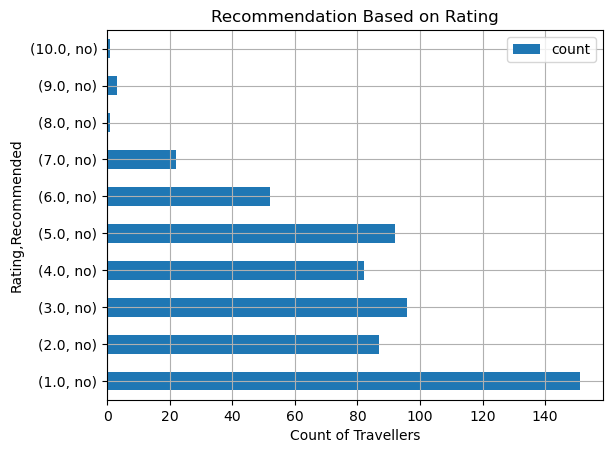

In [74]:
# Grupiranje po Rating i Recommended stupcima za bolje razumijevanje distribucije podataka
df.groupby(['Rating'])['Recommended'].value_counts().plot(kind='barh', grid = True, legend=True)
plt.title("Recommendation Based on Rating")
plt.xlabel("Count of Travellers")
plt.show()

Iz gornjeg prikaza možemo pretpostaviti da putnici koji ocijene svoje iskustvo s ocjenom `8.0` ili više imaju vrlo **malu** vjerojatnost da istu uslugu **neće** preporučiti.

Imajući to na umu, možemo opravdati da se bilo koja ocjena ispod `8.0` smatra kao `Not Recommended` te suprotno tome, bilo koja ocjena uključujući `8.0` i iznad kao `Recommended`. 

In [75]:
rating_mask = df['Rating'] < 8

df.loc[rating_mask, 'Recommended'] = df.loc[rating_mask, 'Recommended'].fillna('no')
df.loc[~rating_mask, 'Recommended'] = df.loc[~rating_mask, 'Recommended'].fillna('Yes')

In [76]:
grouped = df.groupby(['Rating'])['Recommended'].value_counts()

In [77]:
print(grouped)

Rating  Recommended
1.0     no             152
2.0     no              92
3.0     no             109
4.0     no              97
5.0     no             154
6.0     no             134
7.0     no             212
8.0     Yes            278
        no               1
9.0     Yes            409
        no               3
10.0    Yes            725
        no               1
Name: count, dtype: int64


In [78]:
# Postotak preporuka
df['Recommended'].value_counts(normalize=True)*100

Recommended
Yes    59.65357
no     40.34643
Name: proportion, dtype: float64

In [79]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended             0
Aircraft             1087
Verified                0
dtype: int64

<hr>

### Čišćenje podataka - Route stupac

Poglavlje u nastavku fokusira se na obradu nedostajućih podataka u stupcu `Route`<br>

**TLDR**:
- Normalizacija skraćenih ili netočnih naziva zračnih luka kako bi se osigurala konzistentnost i točnost podataka
- Razdvajanje informacija iz stupca `Route` u tri nova stupca pod nazivom `From`, `Via` i `To`


In [80]:
# Prikaz NULL vrijednosti u stupcu Route
df[df['Route'].isna()]

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
836,2019-09-28,1.0,10.0,"""Bitterly disappointed""",C Johnson,United Kingdom,Kuwait to Manchester via Doha. Bitterly disap...,Business,First Class,NaN,September 2019,no,Boeing 777,1.0
1823,2015-10-01,9.0,10.0,"""cabin crew friendly and obliging""",Mike Cameron,United Kingdom,"We flew London to Dubai through Doha, using Qa...",Couple Leisure,Economy Class,NaN,September 2015,Yes,Boeing 777,0.0
1933,2015-06-13,9.0,10.0,Qatar Airways customer review,B Johnson,South Africa,For someone who has become used to the standar...,Business,Business Class,NaN,June 2015,Yes,NaN,0.0
1934,2015-06-07,7.0,10.0,Qatar Airways customer review,W Woon,Singapore,4 flight sectors altogether: SIN-DOH-LHR on 5 ...,Unknown,Economy Class,NaN,June 2015,no,NaN,0.0
1935,2015-06-06,10.0,10.0,Qatar Airways customer review,Graham Williams,United Kingdom,I flew to Thailand for my honeymoon with Qatar...,Unknown,Economy Class,NaN,June 2015,Yes,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2013-08-12,9.0,10.0,Qatar Airways customer review,R Nash,Australia,Flew first class CAI-DOH on QR503 on 8th Aug 2...,Unknown,First Class,NaN,August 2013,Yes,NaN,0.0
2365,2013-08-06,7.0,10.0,Qatar Airways customer review,Gamage Champika,United Arab Emirates,I took a flight to London on 17th July with my...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0
2366,2013-08-06,5.0,10.0,Qatar Airways customer review,Martin Fernandez,Spain,MAD-DOH-DXB and back. Boeing 777 in MAD-DOH se...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0
2367,2013-08-06,7.0,10.0,Qatar Airways customer review,David Monteiro,Switzerland,GVA-AUH A320. Good food but after the main mea...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0


Zastupljeno je ukupno `437` zapisa koji imaju nedostajuće vrijednosti u stupcu `Route`

In [81]:
df['Route'].unique()

array(['Tokyo to London Heathrow via Doha', 'Doha to Montreal',
       'Doha to Perth', ..., 'Milan-Doha and Doha-Guangzhou',
       'Singapore-Doha-Johannesburg', 'MEL-DOH-LHR-DOH-MEL'], dtype=object)

In [82]:
df['Route'].value_counts()

Route
Bangkok to Doha                      16
Doha to Bangkok                      13
Doha to London                       13
London to Doha                       12
LHR to BKK via DOH                    9
                                     ..
Milan to Auckland via Doha/Sydney     1
Amman to Bangkok via Doha             1
Lisbon to Doha                        1
Doha to Dallas                        1
MEL-DOH-LHR-DOH-MEL                   1
Name: count, Length: 1380, dtype: int64

In [83]:
df['Route'].notna().sum()

1930

#### Sanity Check!

- Ukupan broj zapisa u podatkovnom skupu: 2367
- Ukupan broj zapisa koji imaju neku vrijednost u `Route` stupcu: 1930
- Ukupan broj zapisa koji imaju `NULL` vrijednost u `Route` stupcu: 437

In [84]:
# Broj zapisa koji sadrže riječ "to" u stupcu Route
(df['Route'].str.contains("to").sum()) 

1920

In [85]:
# Razdvajanje stupca Route u stupce 'From' i 'To'
df[['From', 'To']] = df['Route'].str.split(' to ', expand=True)

In [86]:
df.sample(10)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,From,To
210,2023-03-09,5.0,10.0,"""not responsible for the compensation""",Yizhong Gu,United States,Our tickets from JFK to MLE were changed fro...,Couple Leisure,Business Class,New York to Diha,February 2023,no,Boeing 777,1.0,New York,Diha
1363,2017-06-14,10.0,10.0,"""this trip was the best so far""",David Graubard,United States,"✅ Verified Review | May 12, flew ORD-DOH-DEL ...",Solo Leisure,Business Class,Chicago to Delhi via Doha,May 2017,Yes,"Boeing 777-300, Boeing 787",1.0,Chicago,Delhi via Doha
521,2021-10-31,8.0,10.0,"""Perfect, can't say anything else""",Mike Andrésen,Sweden,"Perfect, can't say anything else. Smooth che...",Solo Leisure,Business Class,Stockholm to Doha,October 2021,Yes,Boeing 787-8,1.0,Stockholm,Doha
1172,2018-03-17,7.0,10.0,"""Qatar A380 business has to be my favorite""",D Webb,United Kingdom,Return flight to Copenhagen via Doha. Really...,Solo Leisure,Business Class,Bangkok to Copenhagen via Doha,March 2018,no,A380 / Boeing 787,1.0,Bangkok,Copenhagen via Doha
1688,2016-02-26,10.0,10.0,"""really enjoyed my flight""",Juraj Krajcik,Slovakia,Budapest to Bangkok via Doha. I really enjoyed...,Couple Leisure,Economy Class,BUD to BKK via DOH,December 2015,Yes,A380,0.0,BUD,BKK via DOH
1091,2018-08-10,9.0,10.0,"""always had excellent service""",Dilys Anne Kevan,Spain,Melbourne to Madrid via Doha. Between Melbou...,Solo Leisure,Economy Class,Melbourne to Madrid via Doha,August 2018,Yes,A380-800,1.0,Melbourne,Madrid via Doha
663,2020-09-02,1.0,10.0,"""connecting airBaltic flight was cancelled""",S Marlen,Australia,I bought a ticket from Melbourne to Tallin w...,Solo Leisure,Economy Class,Melbourne to Tallinn,September 2020,no,NaN,1.0,Melbourne,Tallinn
2196,2014-05-08,7.0,10.0,Qatar Airways customer review,D Walker,United Kingdom,Very good service providing the price. Staff a...,Unknown,Economy Class,NaN,May 2014,no,NaN,0.0,NaN,NaN
181,2023-04-24,3.0,10.0,"""was against their regulations""",T Layne,United States,I purchased two tickets to ensure I have com...,Solo Leisure,Economy Class,Atlanta to Kuala Lumpur via Doha,March 2023,no,Boeing 777-300ER,1.0,Atlanta,Kuala Lumpur via Doha
1408,2017-04-18,9.0,10.0,"""services are very efficient""",S Valeiro,Philippines,✅ Verified Review | Flew both Qatar Airways B...,Business,Economy Class,Geneva to Manila via Doha,April 2017,Yes,NaN,1.0,Geneva,Manila via Doha


In [87]:
# Not-Null vrijednost u 'From' stupcu
df['From'].notna().sum()

1930

Iz navedenog možemo uočiti da smo uspješno napravili dva nova stupca, `From` i `To` stupac, pri čemu su oba podijeljena prema ključnoj riječi "to". <br>
Nadalje, iz stupca `To` potrebno je napraviti novi stupac pod nazivom `Via`, čije ćemo podatke izvući iz tog istog stupca.

In [88]:
# Not-Null vrijednosti u 'To' stupcu
df['To'].notna().sum()

1920

Budući da je u stupcu `To` popunjeno `1920` zapisa, još uvijek preostaje `10` zapisa koji su prazni.

In [89]:
df[['Author', 'Route']][df['From'].notna() & df['To'].isna()]

,Author,Route
1570,B Nalikov,doh TO sof
1911,Tom Osborne,LHR-DOH-BKK
1913,Denzil Bourne,SIN-LHR via DOH
1914,Denzil Bourne,LHR-SIN via DOH
1921,R Clarke,MEL-DOH-BAH
1927,M LaPrairie,IAD-DOH
1928,B Wijesinghe,IAD-DOH-CMB-DOH-IAD
1930,F Bertoni,Milan-Doha and Doha-Guangzhou
1931,Rob Wood,Singapore-Doha-Johannesburg
1932,Dan James,MEL-DOH-LHR-DOH-MEL


Za `10` iznad ispisanih zapisa ručno ćemo ažurirati podatke u istima.

In [91]:
condition = df['Author'] == 'Tom Osborne'

df.loc[condition, 'From'] = 'Heathrow'
df.loc[condition, 'To'] = 'Suvarnabhumi'

In [92]:
condition = df['Author'] == 'Denzil Bourne'

df.loc[condition, 'From'] = 'Singapore'
df.loc[condition, 'To'] = 'Heathrow'

In [93]:
condition = df['Author'] == 'B Nalikov'

df.loc[condition, 'From'] = 'Doha'
df.loc[condition, 'To'] = 'Sofia'

In [94]:
condition = df['Author'] == 'R Clarke'

df.loc[condition, 'From'] = 'Melbourne'
df.loc[condition, 'To'] = 'Bahrain'

In [95]:
condition = df['Author'] == 'M LaPrairie'

df.loc[condition, 'From'] = 'Dulles'
df.loc[condition, 'To'] = 'Doha'

In [96]:
condition = df['Author'] == 'B Wijesinghe'

df.loc[condition, 'From'] = 'Dulles'
df.loc[condition, 'To'] = 'Bandaranaike'

In [97]:
condition = df['Author'] == 'F Bertoni'

df.loc[condition, 'From'] = 'Milan'
df.loc[condition, 'To'] = 'Guangzhou'

In [98]:
condition = df['Author'] == 'Rob Wood'

df.loc[condition, 'From'] = 'Singapore'
df.loc[condition, 'To'] = 'Johannesburg'

In [99]:
condition = df['Author'] == 'Dan James'

df.loc[condition, 'From'] = 'Melbourne'
df.loc[condition, 'To'] = 'Heathrow'

In [100]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended             0
Aircraft             1087
Verified                0
From                  425
To                    425
dtype: int64

In [101]:
df['From'].unique()

array(['Tokyo', 'Doha', 'Auckland', 'New Delhi', 'Dusseldorf',
       'Frankfurt', 'New York', 'Chicago', 'Nice', 'Penang', 'Ahmedabad',
       'Tbilisi', 'Spain', 'London', 'Beirut', 'Gatwick', 'Bali',
       'Copenhagen', 'Dallas Ft Worth', 'Manchester', 'Athens',
       'Ho Chi Minh', 'Düsseldorf', 'Bangkok', 'Ho Chi Minh City',
       'Kuwait', 'Dubai', 'Milan', 'Brisbane', 'Mahé', 'Lusaka',
       'Istanbul', 'Melbourne', 'Seattle', 'Brussels', 'Perth',
       'Denpasar', 'Stockholm', 'Riyadh', 'Zurich', 'Singapore', 'doh',
       'Oslo', 'Kathmandu', 'Paris', 'Vienna', 'Colombo',
       'London Heathrow', 'Amsterdam', 'Washington', 'Jakarta',
       'Abu Dhabi', 'Entebbe', 'Johannesburg', 'Sydney', 'Philadelphia',
       'Mumbai', 'Warsaw', 'Edinburgh', 'Islamabad', 'Geneva', 'Montreal',
       'Dallas', 'Hanoi', 'Maputo', 'Rome', 'Jarkata', 'Bucharest',
       'Phuket', 'Dublin', 'Manila', 'Harare', 'New York JFK', 'Boston',
       'Los Angeles', 'Madrid', 'Tehran', 'Sofia', 'La

In [102]:
df['To'].unique()

array(['London Heathrow via Doha', 'Montreal', 'Perth', 'London Heathrow',
       'Doha', 'London', 'San Francisco', 'Kilimanjaro via Doha',
       'Melbourne via Doha', 'Johannesburg via Doha', 'Dubai via Doha',
       'Adelaide', 'Doha via Phuket', 'Detroit via Doha',
       'Singapore via Doha', 'Perth via Doha', 'Auckland via Doha',
       'Erbil via Doha', 'London via Doha', 'Goa', 'Brussels',
       'Adelaide via Doha', 'Kolkata via Doha', 'Bangkok via Doha',
       'Bangkok', 'Frankfurt', 'Sydney', 'Manchester via Doha',
       'Warsaw via Doha', 'Tokyo via Doha', 'Delhi via Doha',
       'Kuala Lumpur via Doha', 'Salalah via Doha', 'Amsterdam via Doha',
       'Johannesburg', 'Tbilisi via Doha', 'Lyon via Doha', 'Denpasar',
       'Washington', 'Luanda via Doha', 'Lusaka via Doha',
       'Milan via Doha', 'kwi', 'Sao Paulo via Doha', 'Chicago',
       'Brussels via Doha', 'Seattle', 'Kuwait via Doha', 'Singapore',
       'Gatwick via Doha', 'Denpasar Bali via Doha', 'Cape Town

In [103]:
# RegEx pattern za izdvajanje teksta nakon 'via'
pattern = r'via\s+(.*)'

# Izdvajanje teksta nakon 'via' te kreiranje novog stupca pod nazivom 'Via'
df['Via'] = df['Route'].str.extract(pattern, expand=False)

In [104]:
df.sample(10)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,From,To,Via
1337,2017-07-21,4.0,10.0,"""food was rather limited""",L Geazler,Switzerland,✅ Verified Review | Adelaide to Zurich via Do...,Business,Business Class,Adelaide to Zurich via Doha,July 2017,no,A350,1.0,Adelaide,Zurich via Doha,Doha
2215,2014-04-08,8.0,10.0,Qatar Airways customer review,J Howsam,United Kingdom,Economy - LHR to Melbourne. Boeing 777-200/300...,Unknown,Economy Class,NaN,April 2014,Yes,NaN,0.0,NaN,NaN,NaN
637,2020-11-28,4.0,10.0,"""The service was exemplary""",T Kane,Australia,We flew Sydney-Doha-London business class. W...,Couple Leisure,Business Class,Sydney to London via Doha,October 2020,no,Boeing 777,1.0,Sydney,London via Doha,Doha
2311,2013-11-28,10.0,10.0,Qatar Airways customer review,R Barton,United Kingdom,MAN-DOH-BKK-HAN-SGN-DOH-MAN. Really impressed ...,Unknown,Economy Class,NaN,November 2013,Yes,NaN,0.0,NaN,NaN,NaN
1644,2016-04-23,10.0,10.0,"""fabulous for long haul flights""",Sal Rogers,Australia,✅ Verified Review | Melbourne to Rome via Doh...,Business,Business Class,MEL to FCO via DOH,April 2016,Yes,Boeing 777-300 ER,1.0,MEL,FCO via DOH,DOH
556,2021-08-03,1.0,10.0,"""ask for some form of compensation""",L Yang,United States,"Nairobi - Doha - Boston, with a relatively s...",Solo Leisure,Economy Class,Nairobi to Boston via Doha,July 2021,no,NaN,1.0,Nairobi,Boston via Doha,Doha
61,2023-10-25,5.0,10.0,"""issues on the ground""",Michael Schade,Germany,"Check in at BKK airport swift and friendly,...",Solo Leisure,Business Class,Bangkok to Brussels via Doha,October 2023,no,A380 / Boeing 789,1.0,Bangkok,Brussels via Doha,Doha
348,2022-08-18,6.0,10.0,"""raised my hand when he skipped us""",R Mardunu,Spain,I and my son boarded Qatar Airways from Ente...,Family Leisure,Economy Class,Entebbe to Madrid via Doha,August 2022,no,A330-300,1.0,Entebbe,Madrid via Doha,Doha
1077,2018-09-02,10.0,10.0,"""crew is professional, attentive""",U Colombo,South Africa,Milan to Cape Town via Doha. You have to be ...,Solo Leisure,Business Class,Milan to Cape Town via Doha,August 2018,Yes,Boeing-777 / 787,1.0,Milan,Cape Town via Doha,Doha
612,2021-02-07,10.0,10.0,"""Excellent service provided""",Ikbal Gill,India,Excellent service and so kind and nice and p...,Business,Economy Class,Algiers to Doha,February 2021,Yes,NaN,1.0,Algiers,Doha,NaN


In [105]:
df['To'] = df['To'].str.split(' via ').str[0]

df

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,From,To,Via
0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,NaN,0.0,Tokyo,London Heathrow,Doha
1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,NaN,1.0,Doha,Montreal,NaN
2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,November 2023,no,A380,1.0,Doha,Perth,NaN
3,2024-02-25,10.0,10.0,“I hope they update the A380”,Alwaleed Althani,Qatar,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,Doha to London Heathrow,February 2024,Yes,A380-800,1.0,Doha,London Heathrow,NaN
4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,"Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,Auckland to Doha,February 2024,no,A350,1.0,Auckland,Doha,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2013-08-12,9.0,10.0,Qatar Airways customer review,R Nash,Australia,Flew first class CAI-DOH on QR503 on 8th Aug 2...,Unknown,First Class,NaN,August 2013,Yes,NaN,0.0,NaN,NaN,NaN
2365,2013-08-06,7.0,10.0,Qatar Airways customer review,Gamage Champika,United Arab Emirates,I took a flight to London on 17th July with my...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0,NaN,NaN,NaN
2366,2013-08-06,5.0,10.0,Qatar Airways customer review,Martin Fernandez,Spain,MAD-DOH-DXB and back. Boeing 777 in MAD-DOH se...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0,NaN,NaN,NaN
2367,2013-08-06,7.0,10.0,Qatar Airways customer review,David Monteiro,Switzerland,GVA-AUH A320. Good food but after the main mea...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0,NaN,NaN,NaN


In [106]:
df.sample(10)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,From,To,Via
328,2022-09-07,10.0,10.0,"""surprise was so big""",Elena Gheorghe,Romania,"New York to Bucharest via Doha. On August 27,...",Couple Leisure,Economy Class,New York to Bucharest via Doha,August 2022,Yes,NaN,0.0,New York,Bucharest,Doha
560,2021-07-20,10.0,10.0,"""can recommend this airline""",Ronald Kakas,Slovakia,This was not my first experience with Qatar ...,Solo Leisure,Economy Class,Bangkok to Vienna via Doha,July 2021,Yes,NaN,1.0,Bangkok,Vienna,Doha
2281,2014-01-13,6.0,10.0,Qatar Airways customer review,Philip Mcdaid,Australia,Munich-Doha-Perth. Munich to Doha on pretty em...,Unknown,Economy Class,NaN,January 2014,no,NaN,0.0,NaN,NaN,NaN
1339,2017-07-20,8.0,10.0,"""experience been quite amazing""",P Tarnello,Italy,✅ Verified Review | Venice to Male via Doha. ...,Family Leisure,Economy Class,Venice to Male via Doha,February 2017,Yes,A330-200 / A330-300,1.0,Venice,Male,Doha
1452,2017-02-20,5.0,10.0,"""there is no USB connection""",Zdenek Sychra,Czech Republic,✅ Verified Review | Krabi to Munich via Doha....,Couple Leisure,Economy Class,Krabi to Munich via Doha,February 2017,no,A330,1.0,Krabi,Munich,Doha
1134,2018-05-15,7.0,10.0,"""Boeing 787 was cramped""",Dominic Grundy,Australia,Adelaide to Manchester via Doha. Two flights...,Solo Leisure,Economy Class,Adelaide to Manchester via Doha,May 2018,no,A350-900,1.0,Adelaide,Manchester,Doha
836,2019-09-28,1.0,10.0,"""Bitterly disappointed""",C Johnson,United Kingdom,Kuwait to Manchester via Doha. Bitterly disap...,Business,First Class,NaN,September 2019,no,Boeing 777,1.0,NaN,NaN,NaN
1647,2016-04-13,6.0,10.0,"""some economies being made""",S Thomas,Qatar,✅ Verified Review | Qatar Airways are still u...,Business,Business Class,DOH to MAN,April 2016,no,A330-200,1.0,DOH,MAN,NaN
1540,2016-09-28,5.0,10.0,"""the food service was meagre""",G Schumer,United States,✅ Verified Review | Los Angeles to Johannesbu...,Couple Leisure,Economy Class,LAX to JNB via DOH,September 2016,no,Boeing 777-200LR,1.0,LAX,JNB,DOH
716,2020-03-22,10.0,10.0,"""really good service""",Bibin Tharappel,India,From Doha to Cochi. Qatar Airways Economy cl...,Solo Leisure,Economy Class,Doha to Cochi,March 2020,Yes,NaN,0.0,Doha,Cochi,NaN


In [107]:
df['Via'].unique()

array(['Doha', nan, 'Phuket', 'Dohs', 'dona', 'Montreal & Doha',
       'Doha / Perth', 'Doha, Qatar', 'Doha & Hong Kong',
       'Montreal / Doha', 'Manila', 'Brisbane', 'Dubai', 'Brussels',
       'Dha', 'doha', 'Entebbe, Doha', 'Copenhagen', 'London', 'Adelaide',
       'New York', 'Doha/Sydney', 'Delhi', 'Qatar', 'DOH',
       'Sydney / Doha', 'Bangkok', 'Jakarta', 'Adelaide / Doha', 'Sydney',
       'Baku / Doha', 'Doha, Entebbe', 'SIN', 'BKK / DOH', 'DOA',
       'BKK and DOH', 'DXB', 'BKK/DOH', 'DOH/JNB', 'BRU', 'DSOH', 'BKK',
       'LHR/DOH', 'DOH/BKK', 'BKK, DOH', 'DOH and BKK',
       'BKK-DOH-CPH//DOH'], dtype=object)

In [108]:
df[['From', "To", 'Via']].isna().sum()

From     425
To       425
Via     1010
dtype: int64

In [109]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended             0
Aircraft             1087
Verified                0
From                  425
To                    425
Via                  1010
dtype: int64

In [110]:
# Not-Null vrijednosti u 'Via' stupcu
df['Via'].notna().sum()

1357

In [111]:
# Pretvaranje `Route` stupca u tip String
df['Route'] = df['Route'].astype(str)

# Filtriranje zapisa koji ne sadrže tekst `Via` u stupcu `Route`
filtered_df = df[~df['Route'].str.contains('via')]

In [112]:
# Ažuriranje zapisa koji ne sadrže "Via" u stupcu "Route" sa "Direct"
df.loc[filtered_df.index, "Via"] = "Direct"

In [113]:
df['Via'].isna().sum()

0

Pretvaranje stupca `Route` natrag u objektni tip podataka i zamjena nan (tekstualnih vrijednosti) vrijednosti s NaN (praznim vrijednostima).

In [114]:
df['Route'] = df['Route'].astype(object)

In [115]:
df['Route'] = df['Route'].replace('nan', np.nan)

In [116]:
df.sample(10)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,From,To,Via
1134,2018-05-15,7.0,10.0,"""Boeing 787 was cramped""",Dominic Grundy,Australia,Adelaide to Manchester via Doha. Two flights...,Solo Leisure,Economy Class,Adelaide to Manchester via Doha,May 2018,no,A350-900,1.0,Adelaide,Manchester,Doha
2290,2014-01-03,5.0,10.0,Qatar Airways customer review,Carlos Blanco,United Kingdom,Travelled London (LHR) to Kilimanjaro (JRO) vi...,Unknown,Economy Class,NaN,January 2014,no,NaN,0.0,NaN,NaN,Direct
1652,2016-04-12,9.0,10.0,"""a first class flight""",Albert Wong,China,✅ Verified Review | This flight from Doha to ...,Business,Business Class,DOH to HKG,April 2016,Yes,A343,1.0,DOH,HKG,Direct
1339,2017-07-20,8.0,10.0,"""experience been quite amazing""",P Tarnello,Italy,✅ Verified Review | Venice to Male via Doha. ...,Family Leisure,Economy Class,Venice to Male via Doha,February 2017,Yes,A330-200 / A330-300,1.0,Venice,Male,Doha
412,2022-05-26,10.0,10.0,"""hard time finding anything to complain about""",Jan-Erik Karlsson,Sweden,The first stretch of Bangkok Doha I had a on...,Solo Leisure,Business Class,Bangkok to Stockholm via Doha,April 2022,Yes,NaN,0.0,Bangkok,Stockholm,Doha
58,2023-10-27,9.0,10.0,"""Thank you for the great experience""",Richard Ofiera,Germany,Flight QR 176 Oslo - Doha 26.10.2023 We took...,Family Leisure,Economy Class,Oslo to Doha,October 2023,Yes,Boeing 787-9,0.0,Oslo,Doha,Direct
1664,2016-03-28,10.0,10.0,"""very polite, friendly and smiling""",M Mawanga,United Kingdom,✅ Verified Review | London Heathrow to Cape T...,Solo Leisure,Economy Class,LHR to CPT via DOH,February 2016,Yes,NaN,1.0,LHR,CPT,DOH
2364,2013-08-12,9.0,10.0,Qatar Airways customer review,R Nash,Australia,Flew first class CAI-DOH on QR503 on 8th Aug 2...,Unknown,First Class,NaN,August 2013,Yes,NaN,0.0,NaN,NaN,Direct
514,2021-11-13,10.0,10.0,"""We were so impressed""",Joel Barnaby,United States,We were so impressed with the Q-Suite seats o...,Solo Leisure,Business Class,Philadelphia to Dubai,November 2021,Yes,NaN,1.0,Philadelphia,Dubai,Direct
1715,2016-01-14,9.0,10.0,""" I was nicely surprised""",Vittorio Tomasella,Italy,Venice to Seoul via Doha and my first flight w...,Couple Leisure,Economy Class,VCE to ICN via DOH,October 2015,Yes,Boeing 777-300ER,0.0,VCE,ICN,DOH


In [117]:
df.columns

Index(['Date Published', 'Rating', 'Max Rating', 'Title', 'Author', 'Country',
       'Review Body', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Recommended', 'Aircraft', 'Verified', 'From', 'To', 'Via'],
      dtype='object')

In [118]:
df = df[['Date Published', 'Rating', 'Max Rating','Author', 'Country','Title', 'Review Body', 'Type Of Traveller', 'Seat Type','Date Flown','Aircraft','Route', 'From','Via', 'To','Verified','Recommended']]

In [119]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Author                  0
Country                 0
Title                   0
Review Body             0
Type Of Traveller       0
Seat Type               0
Date Flown              0
Aircraft             1087
Route                 437
From                  425
Via                     0
To                    425
Verified                0
Recommended             0
dtype: int64

#### Zamijena dupliciranih / netočnih vrijednosti u stupcu "From"

In [120]:
df['From'].unique()

array(['Tokyo', 'Doha', 'Auckland', 'New Delhi', 'Dusseldorf',
       'Frankfurt', 'New York', 'Chicago', 'Nice', 'Penang', 'Ahmedabad',
       'Tbilisi', 'Spain', 'London', 'Beirut', 'Gatwick', 'Bali',
       'Copenhagen', 'Dallas Ft Worth', 'Manchester', 'Athens',
       'Ho Chi Minh', 'Düsseldorf', 'Bangkok', 'Ho Chi Minh City',
       'Kuwait', 'Dubai', 'Milan', 'Brisbane', 'Mahé', 'Lusaka',
       'Istanbul', 'Melbourne', 'Seattle', 'Brussels', 'Perth',
       'Denpasar', 'Stockholm', 'Riyadh', 'Zurich', 'Singapore', 'doh',
       'Oslo', 'Kathmandu', 'Paris', 'Vienna', 'Colombo',
       'London Heathrow', 'Amsterdam', 'Washington', 'Jakarta',
       'Abu Dhabi', 'Entebbe', 'Johannesburg', 'Sydney', 'Philadelphia',
       'Mumbai', 'Warsaw', 'Edinburgh', 'Islamabad', 'Geneva', 'Montreal',
       'Dallas', 'Hanoi', 'Maputo', 'Rome', 'Jarkata', 'Bucharest',
       'Phuket', 'Dublin', 'Manila', 'Harare', 'New York JFK', 'Boston',
       'Los Angeles', 'Madrid', 'Tehran', 'Sofia', 'La

In [121]:
name_mapping = {
    'doh': 'Doha',
    'Düsseldorf': 'Dusseldorf',
    'Ho chi Minh City': 'Ho Chi Minh',
    'Brisibane': 'Brisbane',
    'madrid': 'Madrid',
    'manchester': 'Manchester',
    'DEL': 'New Delhi',
    'Doha ': 'Doha',
    'Jarkata': 'Jakarta',
    'MAD': 'Madrid',
    'TXL': 'Berlin Tegel',
    'BCN': 'Barcelona',
    'DOH': 'Doha',
    'KUL': 'Kuala Lumpur',
    'DPS': 'Denpasar',
    'MNL': 'Manila',
    'LHR': 'London Heathrow',
    'CPH': 'Copenhagen',
    'EZE': 'Buenos Aires',
    'MAN': 'Manchester',
    'EDI': 'Edinburgh',
    'SVO': 'Moscow',
    'MEL': 'Melbourne',
    'TUN': 'Tunis'
}

# Zamijena vrijednosti u stupcu 'airport_names' koristeći mapiranje
df['From'] = df['From'].replace(name_mapping)

In [122]:
# Full name mapping rječnik
full_name_mapping = {
    'OSL': 'Oslo',
    'PHL': 'Philadelphia',
    'PER': 'Perth',
    'PNH': 'Phnom Penh',
    'AMM': 'Queen Alia',
    'VCE': 'Venice Marco Polo',
    'ARN': 'Stockholm Arlanda',
    'CPT': 'Cape Town',
    'IAH': 'George Bush',
    'SYD': 'Sydney',
    'HKT': 'Phuket',
    'AMS': 'Amsterdam Schiphol',
    'AUH': 'Abu Dhabi',
    'JNB': 'OR Tambo',
    'ATL': 'Hartsfield-Jackson Atlanta',
    'DXB': 'Dubai',
    'JFK': 'John F. Kennedy',
    'SIN': 'Singapore Changi',
    'HAN': 'Noi Bai',
    'DFW': 'Dallas/Fort Worth',
    'HEL': 'Helsinki-Vantaa',
    'CMB': 'Bandaranaike',
    'PVG': 'Shanghai Pudong',
    'MUC': 'Munich',
    'SGN': 'Tan Son Nhat',
    'IKA': 'Tehran Imam Khomeini',
    'BOM': 'Chhatrapati Shivaji Maharaj',
    'LAX': 'Los Angeles',
    'BRU': 'Brussels',
    'ADL': 'Adelaide',
    'KHI': 'Jinnah',
    'LAS': 'McCarran',
    'ZAG': 'Zagreb',
    'ATH': 'Athens',
    'ICN': 'Incheon',
    'BEY': 'Beirut Rafic Hariri',
    'SOF': 'Sofia',
    'SAO': 'São Paulo Guarulhos',
    'FRA': 'Frankfurt',
    'TIF': 'Taif',
    'ZRH': 'Zurich',
    'WAW': 'Warsaw Chopin',
    'PSA': 'Pisa',
    'MCT': 'Muscat',
    'BOS': 'Logan',
    'CDG': 'Charles de Gaulle',
    'CGK': 'Soekarno Hatta',
    'IAD': 'Washington Dulles',
    'HKG': 'Hong Kong',
    'BHX': 'Birmingham',
    'ISB': 'Islamabad',
    'GRU': 'São Paulo/Guarulhos',
    'BLR': 'Kempegowda',
    'KIX': 'Kansai',
    'JED': 'King Abdulaziz',
    'BUD': 'Budapest Ferenc Liszt',
    'PEN': 'Penang',
    'RUH': 'King Khalid',
    'GYD': 'Heydar Aliyev',
    'MXP': 'Milan Malpensa',
    'HND': 'Haneda',
    'ORD': 'O\'Hare',
    'HBE': 'Borg El Arab',
    'NBO': 'Jomo Kenyatta',
    'NRT': 'Narita',
    'KTM': 'Tribhuvan',
    'SAW': 'Sabiha Gökçen',
    'FCO': 'Leonardo da Vinci Fiumicino',
    'KWI': 'Kuwait',
    'Cape Town': 'Cape Town',
    'DWC': 'Al Maktoum',
    'CAI': 'Cairo',
    'NYC': 'John F. Kennedy',
    'Dar es Salam': 'Julius Nyerere',
    'COK': 'Cochin',
    'Jinnah Int': 'Jinnah',
    'Dubai DWC': 'Al Maktoum',
    'KUala Lumpur': 'Kuala Lumpur'
}

# Zamijena skraćenih imena zračnih luka s punim imenima
df['From'] = df['From'].replace(full_name_mapping)

In [123]:
# Full name mapping rječnik
full_name_mapping = {
    'Tokyo': 'Tokyo',
    'Doha': 'Doha',
    'Auckland': 'Auckland',
    'New Delhi': 'New Delhi',
    'Dusseldorf': 'Düsseldorf',
    'Frankfurt': 'Frankfurt',
    'New York': 'New York',
    'Chicago': 'Chicago',
    'Nice': 'Nice',
    'Penang': 'Penang',
    'Ahmedabad': 'Ahmedabad',
    'Tbilisi': 'Tbilisi',
    'Spain': 'Spain',
    'London': 'London',
    'Beirut': 'Beirut',
    'Gatwick': 'London Gatwick',
    'Bali': 'Bali',
    'Copenhagen': 'Copenhagen',
    'Dallas Ft Worth': 'Dallas/Fort Worth',
    'Manchester': 'Manchester',
    'Athens': 'Athens',
    'Ho Chi Minh': 'Ho Chi Minh City',
    'Bangkok': 'Bangkok',
    'Ho Chi Minh City': 'Ho Chi Minh City',
    'Kuwait': 'Kuwait',
    'Dubai': 'Dubai',
    'Milan': 'Milan',
    'Brisbane': 'Brisbane',
    'Mahé': 'Mahé',
    'Lusaka': 'Lusaka',
    'Istanbul': 'Istanbul',
    'Melbourne': 'Melbourne',
    'Seattle': 'Seattle',
    'Brussels': 'Brussels',
    'Perth': 'Perth',
    'Denpasar': 'Denpasar',
    'Stockholm': 'Stockholm',
    'Riyadh': 'Riyadh',
    'Zurich': 'Zurich',
    'Singapore': 'Singapore',
    'Oslo': 'Oslo',
    'Kathmandu': 'Kathmandu',
    'Paris': 'Paris',
    'Vienna': 'Vienna',
    'Colombo': 'Colombo',
    'London Heathrow': 'London Heathrow',
    'Amsterdam': 'Amsterdam',
    'Washington': 'Washington',
    'Jakarta': 'Jakarta',
    'Abu Dhabi': 'Abu Dhabi',
    'Entebbe': 'Entebbe',
    'Johannesburg': 'Johannesburg',
    'Sydney': 'Sydney',
    'Philadelphia': 'Philadelphia',
    'Mumbai': 'Mumbai',
    'Warsaw': 'Warsaw',
    'Edinburgh': 'Edinburgh',
    'Islamabad': 'Islamabad',
    'Geneva': 'Geneva',
    'Montreal': 'Montreal',
    'Dallas': 'Dallas',
    'Hanoi': 'Hanoi',
    'Maputo': 'Maputo',
    'Rome': 'Rome',
    'Bucharest': 'Bucharest',
    'Phuket': 'Phuket',
    'Dublin': 'Dublin',
    'Manila': 'Manila',
    'Harare': 'Harare',
    'New York JFK': 'John F. Kennedy',
    'Boston': 'Boston',
    'Los Angeles': 'Los Angeles',
    'Madrid': 'Madrid',
    'Tehran': 'Tehran',
    'Sofia': 'Sofia',
    'Lagos': 'Lagos',
    'Prague': 'Prague',
    'Delhi': 'Delhi',
    'Franfurt': 'Frankfurt',
    'Nairobi': 'Nairobi',
    'Thailand': 'Thailand',
    'Atlanta': 'Atlanta',
    'São Paulo': 'São Paulo',
    'Algiers': 'Algiers',
    'Munich': 'Munich',
    'Barcelona': 'Barcelona',
    'Sharjah': 'Sharjah',
    'Miami': 'Miami',
    'Kuala Lumpur': 'Kuala Lumpur',
    'San Francisco': 'San Francisco',
    'Zagreb': 'Zagreb',
    'Cochin': 'Cochin',
    'Cape Town': 'Cape Town',
    'Kochi': 'Kochi',
    'Ankara': 'Ankara',
    'Kigali': 'Kigali',
    'Erbil': 'Erbil',
    'Maldives': 'Maldives',
    'Toronto': 'Toronto',
    'Hyderabad': 'Hyderabad',
    'Lagos, Nigeria': 'Lagos',
    'Tunis': 'Tunis',
    'Madrid ': 'Madrid',
    'Cairo': 'Cairo',
    'Male': 'Male',
    'Chennai': 'Chennai',
    'Bodrum ': 'Bodrum',
    'Malaga': 'Malaga',
    'Chengdu': 'Chengdu',
    'Cebu': 'Cebu',
    'Belgrade': 'Belgrade',
    'Dammam': 'Dammam',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Adelaide': 'Adelaide',
    'Hong Kong': 'Hong Kong',
    'Dallas Fort Worth': 'Dallas/Fort Worth',
    'Kozikhode': 'Kozhikode',
    'Houston': 'Houston',
    'Helsinki': 'Helsinki',
    'Zanzibar': 'Zanzibar',
    'Casablanca': 'Casablanca',
    'Dhaka': 'Dhaka',
    'Kyiv': 'Kyiv',
    'Berlin': 'Berlin',
    'Najaf': 'Najaf',
    'Lahore': 'Lahore',
    'Seoul': 'Seoul',
    'Muscat': 'Muscat',
    'Mogadishu': 'Mogadishu',
    'Zvartnots': 'Zvartnots',
    'Krabi': 'Krabi',
    'Sulaymaniyah': 'Sulaymaniyah',
    'Tblisi': 'Tbilisi',
    'Lisbon': 'Lisbon',
    'Amman': 'Amman',
    'Bangalore': 'Bangalore',
    'Amritsar': 'Amritsar',
    'Yangon': 'Yangon',
    'Budapest': 'Budapest',
    'Birmingham': 'Birmingham',
    'Dulles': 'Dulles',
    'Pisa': 'Pisa',
    'Venice': 'Venice',
    'Goa': 'Goa',
    'Heathrow': 'London Heathrow',
    'Cardiff': 'Cardiff',
    'Mahe': 'Mahé',
    'Kolkata': 'Kolkata',
    'Dar es Salaam': 'Dar es Salaam',
    'Kiev': 'Kiev',
    'Calicut': 'Kozhikode',
    'Moscow': 'Moscow',
    'Paris CDG': 'Charles de Gaulle',
    'Incheon': 'Incheon',
    'Gothenburg': 'Gothenburg',
    'Sarajevo': 'Sarajevo',
    'Clark': 'Clark',
    'London ': 'London',
    'Canberra': 'Canberra',
    'Mahé, Seychelles': 'Mahé',
    'Bombay': 'Mumbai',
    'Nagpur': 'Nagpur',
    'Shanghai': 'Shanghai',
    'Karachi': 'Karachi',
    'Marrakech': 'Marrakech',
    'Berlin Tegel': 'Berlin',
    'BKK': 'Bangkok',
    'Durban': 'Durban',
    'Baku': 'Baku',
    'MAA': 'Chennai',
    'Salalah': 'Salalah',
    'Berlin ': 'Berlin',
    'London Heatrhow': 'London Heathrow',
    'Phnom Penh': 'Phnom Penh',
    'Luxor': 'Luxor',
    'CRK': 'Clark',
    'Washington DC': 'Washington',
    'Medina': 'Medina',
    'Taif': 'Taif',
    'Buenos Aires': 'Buenos Aires',
    'Queen Alia': 'Queen Alia International',
    'Venice Marco Polo': 'Venice Marco Polo',
    'Stockholm Arlanda': 'Stockholm Arlanda',
    'George Bush': 'George Bush Intercontinental',
    'Amsterdam Schiphol': 'Amsterdam Airport Schiphol',
    'OR Tambo': 'O. R. Tambo International',
    'Hartsfield-Jackson Atlanta': 'Hartsfield-Jackson Atlanta International',
    'John F. Kennedy': 'John F. Kennedy International',
    'Singapore Changi': 'Singapore Changi Airport',
    'Noi Bai': 'Noi Bai International',
    'Dallas/Fort Worth': 'Dallas/Fort Worth International',
    'Helsinki-Vantaa': 'Helsinki Airport',
    'Bandaranaike': 'Bandaranaike International',
    'Shanghai Pudong': 'Shanghai Pudong International',
    'Tan Son Nhat': 'Tan Son Nhat International',
    'Tehran Imam Khomeini': 'Imam Khomeini International',
    'Chhatrapati Shivaji Maharaj': 'Chhatrapati Shivaji Maharaj International',
    'Jinnah': 'Jinnah International',
    'McCarran': 'McCarran International',
    'Beirut Rafic Hariri': 'Beirut Rafic Hariri International',
    'São Paulo Guarulhos': 'São Paulo/Guarulhos International',
    'Warsaw Chopin': 'Warsaw Chopin Airport',
    'Logan': 'Logan International',
    'Charles de Gaulle': 'Charles de Gaulle Airport',
    'Soekarno Hatta': 'Soekarno-Hatta International',
    'Washington Dulles': 'Washington Dulles International',
    'São Paulo/Guarulhos': 'São Paulo/Guarulhos International',
    'Kempegowda': 'Kempegowda International',
    'Kansai': 'Kansai International',
    'King Abdulaziz': 'King Abdulaziz International',
    'Budapest Ferenc Liszt': 'Budapest Ferenc Liszt International',
    'King Khalid': 'King Khalid International',
    'Heydar Aliyev': 'Heydar Aliyev International',
    'Milan Malpensa': 'Milan Malpensa Airport',
    'Haneda': 'Haneda Airport',
    "O'Hare": "O'Hare International",
    'Borg El Arab': 'Borg El Arab International',
    'Jomo Kenyatta': 'Jomo Kenyatta International',
    'Narita': 'Narita International',
    'Tribhuvan': 'Tribhuvan International',
    'Sabiha Gökçen': 'Sabiha Gökçen International',
    'Leonardo da Vinci Fiumicino': 'Leonardo da Vinci-Fiumicino Airport',
    'cape town': 'Cape Town',
    'Al Maktoum': 'Al Maktoum International',
    'Julius Nyerere': 'Julius Nyerere International'
}

# Zamijena imena zračnih luka s punim imenima
df['From'] = df['From'].replace(full_name_mapping)

In [124]:
df['From'].unique()

array(['Tokyo', 'Doha', 'Auckland', 'New Delhi', 'Düsseldorf',
       'Frankfurt', 'New York', 'Chicago', 'Nice', 'Penang', 'Ahmedabad',
       'Tbilisi', 'Spain', 'London', 'Beirut', 'London Gatwick', 'Bali',
       'Copenhagen', 'Dallas/Fort Worth', 'Manchester', 'Athens',
       'Ho Chi Minh City', 'Bangkok', 'Kuwait', 'Dubai', 'Milan',
       'Brisbane', 'Mahé', 'Lusaka', 'Istanbul', 'Melbourne', 'Seattle',
       'Brussels', 'Perth', 'Denpasar', 'Stockholm', 'Riyadh', 'Zurich',
       'Singapore', 'Oslo', 'Kathmandu', 'Paris', 'Vienna', 'Colombo',
       'London Heathrow', 'Amsterdam', 'Washington', 'Jakarta',
       'Abu Dhabi', 'Entebbe', 'Johannesburg', 'Sydney', 'Philadelphia',
       'Mumbai', 'Warsaw', 'Edinburgh', 'Islamabad', 'Geneva', 'Montreal',
       'Dallas', 'Hanoi', 'Maputo', 'Rome', 'Bucharest', 'Phuket',
       'Dublin', 'Manila', 'Harare', 'John F. Kennedy', 'Boston',
       'Los Angeles', 'Madrid', 'Tehran', 'Sofia', 'Lagos', 'Prague',
       'Delhi', 'Nairobi',

#### Zamijena dupliciranih / netočnih vrijednosti u stupcu "To"

In [125]:
df['To'].unique()

array(['London Heathrow', 'Montreal', 'Perth', 'Doha', 'London',
       'San Francisco', 'Kilimanjaro', 'Melbourne', 'Johannesburg',
       'Dubai', 'Adelaide', 'Detroit', 'Singapore', 'Auckland', 'Erbil',
       'Goa', 'Brussels', 'Kolkata', 'Bangkok', 'Frankfurt', 'Sydney',
       'Manchester', 'Warsaw', 'Tokyo', 'Delhi', 'Kuala Lumpur',
       'Salalah', 'Amsterdam', 'Tbilisi', 'Lyon', 'Denpasar',
       'Washington', 'Luanda', 'Lusaka', 'Milan', 'kwi', 'Sao Paulo',
       'Chicago', 'Seattle', 'Kuwait', 'Gatwick', 'Denpasar Bali',
       'Cape Town', 'Brisbane', 'Kathmanda', 'Muscat', 'Athens', 'Vienna',
       'Rome', 'Bahrain', 'Colombo', 'Abu Dhabi', 'Istanbul', 'Barcelona',
       'Paris', 'Phuket', 'Edinburgh', 'Kochi', 'Tehran', 'Mumbai',
       'Zurich', 'Berlin', 'New York JFK', 'Windhoek', 'Philadelphia',
       'Riyadh', 'Jakarta', 'Lagos', 'Cochin', 'Baghdad', 'Bali', 'Dhaka',
       'Bucharest', 'Hanoi', 'Dallas', 'Manila', 'Ord', 'Dublin',
       'Zagreb', 'Madrid', 'S

In [126]:
name_mapping = {
    'doh': 'Doha',
    'Düsseldorf': 'Dusseldorf',
    'Ho chi Minh City': 'Ho Chi Minh',
    'Brisibane': 'Brisbane',
    'madrid': 'Madrid',
    'manchester': 'Manchester',
    'DEL': 'New Delhi',
    'Doha ': 'Doha',
    'Jarkata': 'Jakarta',
    'MAD': 'Madrid',
    'TXL': 'Berlin Tegel',
    'BCN': 'Barcelona',
    'DOH': 'Doha',
    'KUL': 'Kuala Lumpur',
    'DPS': 'Denpasar',
    'MNL': 'Manila',
    'LHR': 'London Heathrow',
    'CPH': 'Copenhagen',
    'EZE': 'Buenos Aires',
    'MAN': 'Manchester',
    'EDI': 'Edinburgh',
    'SVO': 'Moscow',
    'MEL': 'Melbourne',
    'TUN': 'Tunis'
}

# Zamijena vrijednosti u stupcu 'airport_names' koristeći mapiranje
df['To'] = df['To'].replace(name_mapping)

In [127]:
# Full name mapping rječnik
full_name_mapping = {
    'OSL': 'Oslo',
    'PHL': 'Philadelphia',
    'PER': 'Perth',
    'PNH': 'Phnom Penh',
    'AMM': 'Queen Alia',
    'VCE': 'Venice Marco Polo',
    'ARN': 'Stockholm Arlanda',
    'CPT': 'Cape Town',
    'IAH': 'George Bush',
    'SYD': 'Sydney',
    'HKT': 'Phuket',
    'AMS': 'Amsterdam Schiphol',
    'AUH': 'Abu Dhabi',
    'JNB': 'OR Tambo',
    'ATL': 'Hartsfield-Jackson Atlanta',
    'DXB': 'Dubai',
    'JFK': 'John F. Kennedy',
    'SIN': 'Singapore Changi',
    'HAN': 'Noi Bai',
    'DFW': 'Dallas/Fort Worth',
    'HEL': 'Helsinki-Vantaa',
    'CMB': 'Bandaranaike',
    'PVG': 'Shanghai Pudong',
    'MUC': 'Munich',
    'SGN': 'Tan Son Nhat',
    'IKA': 'Tehran Imam Khomeini',
    'BOM': 'Chhatrapati Shivaji Maharaj',
    'LAX': 'Los Angeles',
    'BRU': 'Brussels',
    'ADL': 'Adelaide',
    'KHI': 'Jinnah',
    'LAS': 'McCarran',
    'ZAG': 'Zagreb',
    'ATH': 'Athens',
    'ICN': 'Incheon',
    'BEY': 'Beirut Rafic Hariri',
    'SOF': 'Sofia',
    'SAO': 'São Paulo Guarulhos',
    'FRA': 'Frankfurt',
    'TIF': 'Taif',
    'ZRH': 'Zurich',
    'WAW': 'Warsaw Chopin',
    'PSA': 'Pisa',
    'MCT': 'Muscat',
    'BOS': 'Logan',
    'CDG': 'Charles de Gaulle',
    'CGK': 'Soekarno Hatta',
    'IAD': 'Washington Dulles',
    'HKG': 'Hong Kong',
    'BHX': 'Birmingham',
    'ISB': 'Islamabad',
    'GRU': 'São Paulo/Guarulhos',
    'BLR': 'Kempegowda',
    'KIX': 'Kansai',
    'JED': 'King Abdulaziz',
    'BUD': 'Budapest Ferenc Liszt',
    'PEN': 'Penang',
    'RUH': 'King Khalid',
    'GYD': 'Heydar Aliyev',
    'MXP': 'Milan Malpensa',
    'HND': 'Haneda',
    'ORD': 'O\'Hare',
    'HBE': 'Borg El Arab',
    'NBO': 'Jomo Kenyatta',
    'NRT': 'Narita',
    'KTM': 'Tribhuvan',
    'SAW': 'Sabiha Gökçen',
    'FCO': 'Leonardo da Vinci Fiumicino',
    'KWI': 'Kuwait',
    'Cape Town': 'Cape Town',
    'DWC': 'Al Maktoum',
    'CAI': 'Cairo',
    'NYC': 'John F. Kennedy',
    'Dar es Salam': 'Julius Nyerere',
    'COK': 'Cochin',
    'Jinnah Int': 'Jinnah',
    'Dubai DWC': 'Al Maktoum',
    'KUala Lumpur': 'Kuala Lumpur'
}

# Zamijena skraćenih imena zračnih luka s punim imenima
df['To'] = df['To'].replace(full_name_mapping)

In [128]:
# Full name mapping rječnik s ispravkama
full_name_mapping = {
    'Tokyo': 'Tokyo',
    'Doha': 'Doha',
    'Auckland': 'Auckland',
    'New Delhi': 'New Delhi',
    'Dusseldorf': 'Düsseldorf',
    'Frankfurt': 'Frankfurt',
    'New York': 'New York',
    'Chicago': 'Chicago',
    'Nice': 'Nice',
    'Penang': 'Penang',
    'Ahmedabad': 'Ahmedabad',
    'Tbilisi': 'Tbilisi',
    'Spain': 'Spain',
    'London': 'London',
    'Beirut': 'Beirut',
    'Gatwick': 'London Gatwick',
    'Bali': 'Bali',
    'Copenhagen': 'Copenhagen',
    'Dallas Ft Worth': 'Dallas/Fort Worth',
    'Manchester': 'Manchester',
    'Athens': 'Athens',
    'Ho Chi Minh': 'Ho Chi Minh City',
    'Bangkok': 'Bangkok',
    'Ho Chi Minh City': 'Ho Chi Minh City',
    'Kuwait': 'Kuwait',
    'Dubai': 'Dubai',
    'Milan': 'Milan',
    'Brisbane': 'Brisbane',
    'Mahé': 'Mahé',
    'Lusaka': 'Lusaka',
    'Istanbul': 'Istanbul',
    'Melbourne': 'Melbourne',
    'Seattle': 'Seattle',
    'Brussels': 'Brussels',
    'Perth': 'Perth',
    'Denpasar': 'Denpasar',
    'Stockholm': 'Stockholm',
    'Riyadh': 'Riyadh',
    'Zurich': 'Zurich',
    'Singapore': 'Singapore',
    'Oslo': 'Oslo',
    'Kathmandu': 'Kathmandu',
    'Paris': 'Paris',
    'Vienna': 'Vienna',
    'Colombo': 'Colombo',
    'London Heathrow': 'London Heathrow',
    'Amsterdam': 'Amsterdam',
    'Washington': 'Washington',
    'Jakarta': 'Jakarta',
    'Abu Dhabi': 'Abu Dhabi',
    'Entebbe': 'Entebbe',
    'Johannesburg': 'Johannesburg',
    'Sydney': 'Sydney',
    'Philadelphia': 'Philadelphia',
    'Mumbai': 'Mumbai',
    'Warsaw': 'Warsaw',
    'Edinburgh': 'Edinburgh',
    'Islamabad': 'Islamabad',
    'Geneva': 'Geneva',
    'Montreal': 'Montreal',
    'Dallas': 'Dallas',
    'Hanoi': 'Hanoi',
    'Maputo': 'Maputo',
    'Rome': 'Rome',
    'Bucharest': 'Bucharest',
    'Phuket': 'Phuket',
    'Dublin': 'Dublin',
    'Manila': 'Manila',
    'Harare': 'Harare',
    'New York JFK': 'John F. Kennedy',
    'Boston': 'Boston',
    'Los Angeles': 'Los Angeles',
    'Madrid': 'Madrid',
    'Tehran': 'Tehran',
    'Sofia': 'Sofia',
    'Lagos': 'Lagos',
    'Prague': 'Prague',
    'Delhi': 'Delhi',
    'Franfurt': 'Frankfurt',
    'Nairobi': 'Nairobi',
    'Thailand': 'Thailand',
    'Atlanta': 'Atlanta',
    'São Paulo': 'São Paulo',
    'Algiers': 'Algiers',
    'Munich': 'Munich',
    'Barcelona': 'Barcelona',
    'Sharjah': 'Sharjah',
    'Miami': 'Miami',
    'Kuala Lumpur': 'Kuala Lumpur',
    'San Francisco': 'San Francisco',
    'Zagreb': 'Zagreb',
    'Cochin': 'Cochin',
    'Cape Town': 'Cape Town',
    'Kochi': 'Kochi',
    'Ankara': 'Ankara',
    'Kigali': 'Kigali',
    'Erbil': 'Erbil',
    'Maldives': 'Maldives',
    'Toronto': 'Toronto',
    'Hyderabad': 'Hyderabad',
    'Lagos, Nigeria': 'Lagos',
    'Tunis': 'Tunis',
    'Madrid ': 'Madrid',
    'Cairo': 'Cairo',
    'Male': 'Male',
    'Chennai': 'Chennai',
    'Bodrum ': 'Bodrum',
    'Malaga': 'Malaga',
    'Chengdu': 'Chengdu',
    'Cebu': 'Cebu',
    'Belgrade': 'Belgrade',
    'Dammam': 'Dammam',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Adelaide': 'Adelaide',
    'Hong Kong': 'Hong Kong',
    'Dallas Fort Worth': 'Dallas/Fort Worth',
    'Kozikhode': 'Kozhikode',
    'Houston': 'Houston',
    'Helsinki': 'Helsinki',
    'Zanzibar': 'Zanzibar',
    'Casablanca': 'Casablanca',
    'Dhaka': 'Dhaka',
    'Kyiv': 'Kyiv',
    'Berlin': 'Berlin',
    'Najaf': 'Najaf',
    'Lahore': 'Lahore',
    'Seoul': 'Seoul',
    'Muscat': 'Muscat',
    'Mogadishu': 'Mogadishu',
    'Zvartnots': 'Zvartnots',
    'Krabi': 'Krabi',
    'Sulaymaniyah': 'Sulaymaniyah',
    'Tblisi': 'Tbilisi',
    'Lisbon': 'Lisbon',
    'Amman': 'Amman',
    'Bangalore': 'Bangalore',
    'Amritsar': 'Amritsar',
    'Yangon': 'Yangon',
    'Budapest': 'Budapest',
    'Birmingham': 'Birmingham',
    'Dulles': 'Dulles',
    'Pisa': 'Pisa',
    'Venice': 'Venice',
    'Goa': 'Goa',
    'Heathrow': 'London Heathrow',
    'Cardiff': 'Cardiff',
    'Mahe': 'Mahé',
    'Kolkata': 'Kolkata',
    'Dar es Salaam': 'Dar es Salaam',
    'Kiev': 'Kiev',
    'Calicut': 'Kozhikode',
    'Moscow': 'Moscow',
    'Paris CDG': 'Charles de Gaulle',
    'Incheon': 'Incheon',
    'Gothenburg': 'Gothenburg',
    'Sarajevo': 'Sarajevo',
    'Clark': 'Clark',
    'London ': 'London',
    'Canberra': 'Canberra',
    'Mahé, Seychelles': 'Mahé',
    'Bombay': 'Mumbai',
    'Nagpur': 'Nagpur',
    'Shanghai': 'Shanghai',
    'Karachi': 'Karachi',
    'Marrakech': 'Marrakech',
    'Berlin Tegel': 'Berlin',
    'BKK': 'Bangkok',
    'Durban': 'Durban',
    'Baku': 'Baku',
    'MAA': 'Chennai',
    'Salalah': 'Salalah',
    'Berlin ': 'Berlin',
    'London Heatrhow': 'London Heathrow',
    'Phnom Penh': 'Phnom Penh',
    'Luxor': 'Luxor',
    'CRK': 'Clark',
    'Washington DC': 'Washington',
    'Medina': 'Medina',
    'Taif': 'Taif',
    'Buenos Aires': 'Buenos Aires',
    'Queen Alia': 'Queen Alia International',
    'Venice Marco Polo': 'Venice Marco Polo',
    'Stockholm Arlanda': 'Stockholm Arlanda',
    'George Bush': 'George Bush Intercontinental',
    'Amsterdam Schiphol': 'Amsterdam Airport Schiphol',
    'OR Tambo': 'O. R. Tambo International',
    'Hartsfield-Jackson Atlanta': 'Hartsfield-Jackson Atlanta International',
    'John F. Kennedy': 'John F. Kennedy International',
    'Singapore Changi': 'Singapore Changi Airport',
    'Noi Bai': 'Noi Bai International',
    'Dallas/Fort Worth': 'Dallas/Fort Worth International',
    'Helsinki-Vantaa': 'Helsinki Airport',
    'Bandaranaike': 'Bandaranaike International',
    'Shanghai Pudong': 'Shanghai Pudong International',
    'Tan Son Nhat': 'Tan Son Nhat International',
    'Tehran Imam Khomeini': 'Imam Khomeini International',
    'Chhatrapati Shivaji Maharaj': 'Chhatrapati Shivaji Maharaj International',
    'Jinnah': 'Jinnah International',
    'McCarran': 'McCarran International',
    'Beirut Rafic Hariri': 'Beirut Rafic Hariri International',
    'São Paulo Guarulhos': 'São Paulo/Guarulhos International',
    'Warsaw Chopin': 'Warsaw Chopin Airport',
    'Logan': 'Logan International',
    'Charles de Gaulle': 'Charles de Gaulle Airport',
    'Soekarno Hatta': 'Soekarno-Hatta International',
    'Washington Dulles': 'Washington Dulles International',
    'São Paulo/Guarulhos': 'São Paulo/Guarulhos International',
    'Kempegowda': 'Kempegowda International',
    'Kansai': 'Kansai International',
    'King Abdulaziz': 'King Abdulaziz International',
    'Budapest Ferenc Liszt': 'Budapest Ferenc Liszt International',
    'King Khalid': 'King Khalid International',
    'Heydar Aliyev': 'Heydar Aliyev International',
    'Milan Malpensa': 'Milan Malpensa Airport',
    'Haneda': 'Haneda Airport',
    "O'Hare": "O'Hare International",
    'Borg El Arab': 'Borg El Arab International',
    'Jomo Kenyatta': 'Jomo Kenyatta International',
    'Narita': 'Narita International',
    'Tribhuvan': 'Tribhuvan International',
    'Sabiha Gökçen': 'Sabiha Gökçen International',
    'Leonardo da Vinci Fiumicino': 'Leonardo da Vinci-Fiumicino Airport',
    'cape town': 'Cape Town',
    'Al Maktoum': 'Al Maktoum International',
    'Julius Nyerere': 'Julius Nyerere International'
}

# Zamijena naziva zračnih luka s točnim punim imenima
df['To'] = df['To'].replace(full_name_mapping)

In [129]:
city_mapping = {
    'London Heathrow': 'London',
    'Montreal': 'Montreal',
    'Perth': 'Perth',
    'Doha': 'Doha',
    'London': 'London',
    'San Francisco': 'San Francisco',
    'Kilimanjaro': 'Kilimanjaro',
    'Melbourne': 'Melbourne',
    'Johannesburg': 'Johannesburg',
    'Dubai': 'Dubai',
    'Adelaide': 'Adelaide',
    'Detroit': 'Detroit',
    'Singapore': 'Singapore',
    'Auckland': 'Auckland',
    'Erbil': 'Erbil',
    'Goa': 'Goa',
    'Brussels': 'Brussels',
    'Kolkata': 'Kolkata',
    'Bangkok': 'Bangkok',
    'Frankfurt': 'Frankfurt',
    'Sydney': 'Sydney',
    'Manchester': 'Manchester',
    'Warsaw': 'Warsaw',
    'Tokyo': 'Tokyo',
    'Delhi': 'New Delhi',
    'Kuala Lumpur': 'Kuala Lumpur',
    'Salalah': 'Salalah',
    'Amsterdam': 'Amsterdam',
    'Tbilisi': 'Tbilisi',
    'Lyon': 'Lyon',
    'Denpasar': 'Denpasar',
    'Washington': 'Washington',
    'Luanda': 'Luanda',
    'Lusaka': 'Lusaka',
    'Milan': 'Milan',
    'kwi': 'Kuwait City',
    'Sao Paulo': 'Sao Paulo',
    'Chicago': 'Chicago',
    'Seattle': 'Seattle',
    'Kuwait': 'Kuwait City',
    'London Gatwick': 'London',
    'Denpasar Bali': 'Denpasar',
    'Cape Town': 'Cape Town',
    'Brisbane': 'Brisbane',
    'Kathmanda': 'Kathmandu',
    'Muscat': 'Muscat',
    'Athens': 'Athens',
    'Vienna': 'Vienna',
    'Rome': 'Rome',
    'Bahrain': 'Manama',
    'Colombo': 'Colombo',
    'Abu Dhabi': 'Abu Dhabi',
    'Istanbul': 'Istanbul',
    'Barcelona': 'Barcelona',
    'Paris': 'Paris',
    'Phuket': 'Phuket',
    'Edinburgh': 'Edinburgh',
    'Kochi': 'Kochi',
    'Tehran': 'Tehran',
    'Mumbai': 'Mumbai',
    'Zurich': 'Zurich',
    'Berlin': 'Berlin',
    'John F. Kennedy': 'New York',
    'Windhoek': 'Windhoek',
    'Philadelphia': 'Philadelphia',
    'Riyadh': 'Riyadh',
    'Jakarta': 'Jakarta',
    'Lagos': 'Lagos',
    'Cochin': 'Kochi',
    'Baghdad': 'Baghdad',
    'Dhaka': 'Dhaka',
    'Bucharest': 'Bucharest',
    'Hanoi': 'Hanoi',
    'Dallas': 'Dallas',
    'Manila': 'Manila',
    'Ord': 'Chicago',
    'Dublin': 'Dublin',
    'Zagreb': 'Zagreb',
    'Madrid': 'Madrid',
    'São Paulo': 'Sao Paulo',
    'Nairobi': 'Nairobi',
    'Hamad': 'Doha',
    'Diha': 'Doha',
    'Bangalore': 'Bengaluru',
    'sharjah': 'Sharjah',
    'Male': 'Male',
    'Islamabad': 'Islamabad',
    'Ho Chi Minh City': 'Ho Chi Minh City',
    'Prague': 'Prague',
    'Toronto': 'Toronto',
    'Karachi': 'Karachi',
    'Munich': 'Munich',
    'Oslo': 'Oslo',
    'Boston': 'Boston',
    'Dammam': 'Dammam',
    'Lahore': 'Lahore',
    'Miami': 'Miami',
    'Hyderabad': 'Hyderabad',
    ' Doha': 'Doha',
    'Mactan': 'Lapu-Lapu City',
    'Cairo': 'Cairo',
    'Cebu': 'Cebu City',
    'Budapest': 'Budapest',
    'Atlanta': 'Atlanta',
    'Helsinki': 'Helsinki',
    'Beirut': 'Beirut',
    'Entebbe': 'Entebbe',
    'New York': 'New York',
    'San Diego': 'San Diego',
    'Hong Kong': 'Hong Kong',
    'Nagpur': 'Nagpur',
    'Los Angeles': 'Los Angeles',
    'Durban': 'Durban',
    'Chennai': 'Chennai',
    'Amman': 'Amman',
    'Kozhikode': 'Kozhikode',
    'Ahmedabad': 'Ahmedabad',
    'Stockholm': 'Stockholm',
    'Kathmandu': 'Kathmandu',
    'Copenhagen': 'Copenhagen',
    "Chicago O'Hare": 'Chicago',
    'Houston': 'Houston',
    'Sialkot': 'Sialkot',
    'Medina': 'Medina',
    'Baku': 'Baku',
    'Moscow': 'Moscow',
    'Cape town': 'Cape Town',
    'Casablanca': 'Casablanca',
    'Lahore VIA \\DOHA': 'Lahore',
    'Larnaca': 'Larnaca',
    'Clark': 'Clark Freeport Zone',
    'Jeddah': 'Jeddah',
    'Maldives': 'Malé',
    'Keflavik': 'Keflavík',
    'Basra': 'Basra',
    'Yerevan': 'Yerevan',
    'Bengaluru': 'Bengaluru',
    'Sao Paulo GRU': 'Sao Paulo',
    'Tokyo Narita': 'Tokyo',
    'Zanzibar': 'Zanzibar City',
    'Bermuda': 'Hamilton',
    'Washington Dulles International': 'Washington',
    'Seoul Incheon': 'Seoul',
    'Tallinn': 'Tallinn',
    'Dallas/Fort Worth': 'Dallas',
    'Vancouver': 'Vancouver',
    'Cochi': 'Kochi',
    'Danang': 'Da Nang',
    'Najaf': 'Najaf',
    'St Petersburg': 'St. Petersburg',
    'Da Nang': 'Da Nang',
    'Kyiv': 'Kyiv',
    'Shanghai': 'Shanghai',
    'Antalya': 'Antalya',
    'Sofia': 'Sofia',
    'Kigali': 'Kigali',
    'Phnom Penh': 'Phnom Penh',
    'Gothenburg': 'Gothenburg',
    'Langkawi': 'Langkawi',
    'Penang': 'George Town',
    'Birmingham': 'Birmingham',
    'Multan': 'Multan',
    'nan': 'Unknown',
    'Seoul': 'Seoul',
    'Venice': 'Venice',
    'Nice': 'Nice',
    'Tunis': 'Tunis',
    'Ankara': 'Ankara',
    'Amritsar': 'Amritsar',
    'Rio de Janeiro': 'Rio de Janeiro',
    ' Gatwick': 'London',
    'Dar Es Salaam': 'Dar es Salaam',
    'Geneva': 'Geneva',
    'Trivandrum': 'Thiruvananthapuram',
    'Cardiff': 'Cardiff',
    'Hi Chi Minh City': 'Ho Chi Minh City',
    'Dublin ': 'Dublin',
    'Charles de Gaulle': 'Paris',
    'Chiang Mai': 'Chiang Mai',
    'Incheon': 'Incheon',
    'Guangzhou': 'Guangzhou',
    'Chennai return': 'Chennai',
    'John F. Kennedy International': 'New York',
    'Kiev': 'Kyiv',
    'Hyderabad ': 'Hyderabad',
    'Belgrade': 'Belgrade',
    'Melbourne Australia': 'Melbourne',
    'Yangon': 'Yangon',
    'Singapore Changi Airport': 'Singapore',
    'Chongqing': 'Chongqing',
    'Khartoum': 'Khartoum',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Pnom Penh': 'Phnom Penh',
    'Alexandria': 'Alexandria',
    'Taif': 'Taif',
    'Bandaranaike International': 'Colombo',
    'Chhatrapati Shivaji Maharaj International': 'Mumbai',
    'CMN': 'Casablanca',
    'Narita International': 'Tokyo',
    'Tan Son Nhat International': 'Ho Chi Minh City',
    'Tribhuvan International': 'Kathmandu',
    'GOI': 'Goa',
    'CCU': 'Kolkata',
    'BRUvia DOH': 'Brussels',
    'Al Maktoum International': 'Dubai',
    'Queen Alia International': 'Amman',
    'New Delhi': 'New Delhi',
    'JRO': 'Arusha',
    'Charles de Gaulle Airport': 'Paris',
    'Leonardo da Vinci-Fiumicino Airport': 'Rome',
    'Hartsfield-Jackson Atlanta International': 'Atlanta',
    'Venice Marco Polo': 'Venice',
    'O. R. Tambo International': 'Johannesburg',
    'Soekarno-Hatta International': 'Jakarta',
    'Jinnah International': 'Karachi',
    'DAR': 'Dar es Salaam',
    'LHE': 'Lahore',
    'MLE': 'Malé',
    'GVA': 'Geneva',
    'Warsaw Chopin Airport': 'Warsaw',
    "O'Hare International": 'Chicago',
    'Noi Bai International': 'Hanoi',
    'Shanghai Pudong International': 'Shanghai',
    'AKL': 'Auckland',
    'HYD': 'Hyderabad',
    'IST': 'Istanbul',
    'DUR': 'Durban',
    'BEG': 'Belgrade',
    'CNB': 'Coimbatore',
    'VIE': 'Vienna',
    'MCO': 'Orlando',
    'Dallas/Fort Worth International': 'Dallas',
    'goa': 'Goa',
    'DAC': 'Dhaka',
    'Amsterdam Airport Schiphol': 'Amsterdam',
    'YUL': 'Montreal',
    'SNG': 'Singapore',
    'Haneda Airport': 'Tokyo',
    'AMD': 'Ahmedabad',
    'LOS': 'Lagos',
    'Jomo Kenyatta International': 'Nairobi',
    'SYZ': 'Shiraz',
    'Stockholm Arlanda': 'Stockholm',
    'Heydar Aliyev International': 'Baku',
    'STO': 'Stockholm',
    'brussels': 'Brussels',
    'RGN': 'Yangon',
    'Doha airport': 'Doha',
    'Istanbul (SAW)': 'Istanbul',
    'Johanesburg': 'Johannesburg',
    'Suvarnabhumi': 'Bangkok',
    'MIA': 'Miami',
    'Buenos Aires': 'Buenos Aires'
}

# Zamijena imena gradova s točnim punim imenima gradova
df['To'] = df['To'].replace(city_mapping)

In [130]:
df['To'] = df['To'].replace({'Kuwait City': 'Kuwait', 'Ho Chi Minh City': 'Ho Chi Minh', 'Cebu City': 'Cebu', 'Zanzibar City': 'Zanzibar'})

In [131]:
df['To'].unique()

array(['London', 'Montreal', 'Perth', 'Doha', 'San Francisco',
       'Kilimanjaro', 'Melbourne', 'Johannesburg', 'Dubai', 'Adelaide',
       'Detroit', 'Singapore', 'Auckland', 'Erbil', 'Goa', 'Brussels',
       'Kolkata', 'Bangkok', 'Frankfurt', 'Sydney', 'Manchester',
       'Warsaw', 'Tokyo', 'New Delhi', 'Kuala Lumpur', 'Salalah',
       'Amsterdam', 'Tbilisi', 'Lyon', 'Denpasar', 'Washington', 'Luanda',
       'Lusaka', 'Milan', 'Kuwait', 'Sao Paulo', 'Chicago', 'Seattle',
       'Cape Town', 'Brisbane', 'Kathmandu', 'Muscat', 'Athens', 'Vienna',
       'Rome', 'Manama', 'Colombo', 'Abu Dhabi', 'Istanbul', 'Barcelona',
       'Paris', 'Phuket', 'Edinburgh', 'Kochi', 'Tehran', 'Mumbai',
       'Zurich', 'Berlin', 'New York', 'Windhoek', 'Philadelphia',
       'Riyadh', 'Jakarta', 'Lagos', 'Baghdad', 'Bali', 'Dhaka',
       'Bucharest', 'Hanoi', 'Dallas', 'Manila', 'Dublin', 'Zagreb',
       'Madrid', 'Nairobi', 'Bengaluru', 'Sharjah', 'Male', 'Islamabad',
       'Ho Chi Minh', 'Pr

In [132]:
df.head()

,Date Published,Rating,Max Rating,Author,Country,Title,Review Body,Type Of Traveller,Seat Type,Date Flown,Aircraft,Route,From,Via,To,Verified,Recommended
0,2024-03-02,1.0,10.0,Mary Le,United Kingdom,“marred by inconveniences”,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,March 2024,NaN,Tokyo to London Heathrow via Doha,Tokyo,Doha,London,0.0,no
1,2024-02-29,1.0,10.0,Brian English,Canada,"""seat wouldn't stay up""",They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,February 2024,NaN,Doha to Montreal,Doha,Direct,Montreal,1.0,no
2,2024-02-29,1.0,10.0,Wayne Burgess,Australia,"""no attempt to address our complaint""",I have sent 5 emails and have only received ...,Business,Economy Class,November 2023,A380,Doha to Perth,Doha,Direct,Perth,1.0,no
3,2024-02-25,10.0,10.0,Alwaleed Althani,Qatar,“I hope they update the A380”,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,February 2024,A380-800,Doha to London Heathrow,Doha,Direct,London,1.0,Yes
4,2024-02-22,7.0,10.0,W Warnock,United Kingdom,"""I’d rate them maybe 7/10""","Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,February 2024,A350,Auckland to Doha,Auckland,Direct,Doha,1.0,no


Proces čišćenja podataka za stupce `From` i `To` je uspješno proveden.

In [133]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Author                  0
Country                 0
Title                   0
Review Body             0
Type Of Traveller       0
Seat Type               0
Date Flown              0
Aircraft             1087
Route                 437
From                  425
Via                     0
To                    425
Verified                0
Recommended             0
dtype: int64

Obzirom da ne postoji način da saznamo dodatne informacije o nedostajućim podacima u stupcu `Route`, dropat ćemo ih.

In [134]:
df.dropna(inplace = True)

In [135]:
df.isna().sum()

Date Published       0
Rating               0
Max Rating           0
Author               0
Country              0
Title                0
Review Body          0
Type Of Traveller    0
Seat Type            0
Date Flown           0
Aircraft             0
Route                0
From                 0
Via                  0
To                   0
Verified             0
Recommended          0
dtype: int64

#### Zamijena dupliciranih / netočnih vrijednosti u stupcu "Via"

In [136]:
df['Via'].unique()

array(['Direct', 'Doha', 'Phuket', 'Dohs', 'dona', 'Doha & Hong Kong',
       'Manila', 'Dubai', 'Brussels', 'Dha', 'Entebbe, Doha', 'London',
       'Adelaide', 'Doha/Sydney', 'DOH', 'Sydney / Doha', 'Bangkok',
       'Adelaide / Doha', 'Sydney', 'Baku / Doha', 'Doha, Entebbe',
       'doha', 'SIN', 'BKK / DOH', 'DOA', 'BKK and DOH', 'DXB', 'BRU',
       'DSOH', 'BKK', 'DOH/BKK', 'BKK, DOH', 'DOH and BKK', 'BKK/DOH',
       'BKK-DOH-CPH//DOH'], dtype=object)

In [137]:
mapping = {
    'Dohs': 'Doha',
    'dona': 'Dubai',
    'Doha & Hong Kong': 'Doha',
    'Dha': 'Doha',
    'Entebbe, Doha': 'Doha',
    'Doha/Sydney': 'Doha',
    'DOH': 'Doha',
    'Sydney / Doha': 'Doha',
    'Adelaide / Doha': 'Doha',
    'Baku / Doha': 'Doha',
    'Doha, Entebbe': 'Doha',
    'doha': 'Doha',
    'SIN': 'Singapore',
    'BKK / DOH': 'Bangkok',
    'DOA': 'Doha',
    'BKK and DOH': 'Bangkok',
    'DXB': 'Dubai',
    'BRU': 'Brussels',
    'DSOH': 'Doha',
    'BKK': 'Bangkok',
    'DOH/BKK': 'Bangkok',
    'BKK, DOH': 'Bangkok',
    'DOH and BKK': 'Bangkok',
    'BKK/DOH': 'Bangkok',
    'BKK-DOH-CPH//DOH': 'Bangkok'
}

df['Via'] = df['Via'].replace(mapping)

In [138]:
# Jedinstvene vrijednosti nakon zamijene dupliciranih ili netočnih u stupcu Via
df['Via'].unique()

array(['Direct', 'Doha', 'Phuket', 'Dubai', 'Manila', 'Brussels',
       'London', 'Adelaide', 'Bangkok', 'Sydney', 'Singapore'],
      dtype=object)

In [139]:
df.isna().sum()

Date Published       0
Rating               0
Max Rating           0
Author               0
Country              0
Title                0
Review Body          0
Type Of Traveller    0
Seat Type            0
Date Flown           0
Aircraft             0
Route                0
From                 0
Via                  0
To                   0
Verified             0
Recommended          0
dtype: int64

### 🎉 Proces čišćenja podataka uspješno je završen

<hr>

In [140]:
# Pretvaranje očišćenih podataka u .csv format
df.to_csv("cleaned_qatar_airways_reviews.csv", index=False)

In [141]:
df = pd.read_csv("cleaned_qatar_airways_reviews.csv")

In [142]:
df.sample(15)

,Date Published,Rating,Max Rating,Author,Country,Title,Review Body,Type Of Traveller,Seat Type,Date Flown,Aircraft,Route,From,Via,To,Verified,Recommended
286,2022-01-21,3.0,10.0,Michael Schade,Germany,"""inconsistency of seating comfort""",Flight from Warsaw to Doha uneventful; reaso...,Solo Leisure,Business Class,January 2022,Boeing 787 / AB332,Warsaw to Bangkok via Doha,Warsaw,Doha,Bangkok,1.0,no
809,2017-07-03,10.0,10.0,C Stratton,United Kingdom,"""they are streets ahead""",✅ Verified Review | First time on Qatar Airwa...,Family Leisure,Business Class,June 2017,A380 / A330,London to Bali via Doha,London,Doha,Bali,1.0,Yes
100,2023-05-06,9.0,10.0,S Karsen,Sweden,"""Service on point as always""",Always good to travel business in a Boeing 7...,Solo Leisure,Business Class,March 2023,Boeing 787-8,Stockholm to Doha,Stockholm,Direct,Doha,1.0,Yes
612,2018-08-16,8.0,10.0,Alwaleed Althani,Qatar,"""the flight was spotless""",Paris to Doha. We had a ONE WORLD logo aircr...,Family Leisure,Business Class,August 2018,A350-900,Paris to Doha,Paris,Direct,Doha,1.0,Yes
1189,2015-09-23,5.0,10.0,J Tangyong,Netherlands,"""cramped 3-3-3 seat layout""",Was looking forward to experience Qatar Airway...,Solo Leisure,Economy Class,January 2015,Boeing 787,Munich to Doha,Munich,Direct,Doha,0.0,no
301,2021-11-01,10.0,10.0,Shabbir Hossain,United States,"""I will always pick Qatar over any other airline""",This is my fourth time flying Qatar in busine...,Solo Leisure,Business Class,October 2021,A350-900,Dhaka to Atlanta via Doha,Dhaka,Doha,Atlanta,1.0,Yes
492,2019-06-14,1.0,10.0,E Lamise,Australia,"""no bassinets available""",We are extremely disappointed at the treatme...,Family Leisure,Economy Class,June 2019,A380,Melbourne to Milan via Doha,Melbourne,Doha,Milan,1.0,no
690,2018-02-24,3.0,10.0,Jon Theal,United States,"""luggage handling is infuriating""",Chicago to Doha. I saw the ticket agent phys...,Business,Economy Class,February 2018,Boeing 777-300,Chicago to Doha,Chicago,Direct,Doha,1.0,no
834,2017-05-16,9.0,10.0,R Dorman,Qatar,"""Exceptionally fine short haul service""",✅ Verified Review | Doha to Riyadh. Exception...,Business,First Class,May 2017,A330,Doha to Riyadh,Doha,Direct,Riyadh,1.0,Yes
870,2017-03-22,10.0,10.0,S Thomson,Greece,"""decent, spacious seats""",✅ Verified Review | Check in at Athens Airpor...,Business,Economy Class,March 2017,A320/200 & A350,Athens to Dubai via Doha,Athens,Doha,Dubai,1.0,Yes


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     1278 non-null   object 
 1   Rating             1278 non-null   float64
 2   Max Rating         1278 non-null   float64
 3   Author             1278 non-null   object 
 4   Country            1278 non-null   object 
 5   Title              1278 non-null   object 
 6   Review Body        1278 non-null   object 
 7   Type Of Traveller  1278 non-null   object 
 8   Seat Type          1278 non-null   object 
 9   Date Flown         1278 non-null   object 
 10  Aircraft           1278 non-null   object 
 11  Route              1278 non-null   object 
 12  From               1278 non-null   object 
 13  Via                1278 non-null   object 
 14  To                 1278 non-null   object 
 15  Verified           1278 non-null   float64
 16  Recommended        1278 

In [144]:
df.describe()

,Rating,Max Rating,Verified
count,1278.000000,1278.0,1278.000000
mean,7.758998,10.0,0.763693
std,2.531520,0.0,0.424979
min,1.000000,10.0,0.000000
25%,6.000000,10.0,1.000000
50%,9.000000,10.0,1.000000
75%,10.000000,10.0,1.000000
max,10.000000,10.0,1.000000


In [145]:
df.isna().sum()

Date Published       0
Rating               0
Max Rating           0
Author               0
Country              0
Title                0
Review Body          0
Type Of Traveller    0
Seat Type            0
Date Flown           0
Aircraft             0
Route                0
From                 0
Via                  0
To                   0
Verified             0
Recommended          0
dtype: int64